In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi
from numpy.linalg import svd
from scipy.optimize import minimize
from numpy.linalg import matrix_rank
import scipy

#import cdstoolbox as ct


In [2]:
panel_data = pd.read_pickle('panel_data')
data = pd.read_pickle('data')
panel_data2 = pd.read_pickle('panel_data2')
data2 = pd.read_pickle('data2')
#data['INM_CM4'] = data2['INM_CM4']
#data['CAMS_CSM1'] = data2['CAMS_CSM1']
proj = pd.read_pickle('projections')
data

,ACCESS_CM2,BCC_XSM2_MR,CanESM5_CanOE,CNRM_CM6,KACE,CESM2,CNRM_ESM1,GFDL_ESM4,UKESM1,HadGEM_GC31_LL,MIROC6,TRUE
0,0.375954,-0.601654,0.070961,-0.263155,-0.206761,0.057175,0.424696,-0.363606,0.640044,0.549923,0.045581,-0.348009
1,0.973208,-0.662668,-0.037884,0.319128,-0.384065,-0.042319,0.248771,-0.324211,0.712845,0.604639,0.135325,-0.395596
2,0.497969,-0.236120,-0.114808,-0.195107,-0.173415,-0.133353,0.194304,0.041495,0.932074,0.642588,-0.020864,-0.225602
3,0.357068,-0.233272,0.024674,-0.306039,-0.275843,0.023327,-0.006229,-0.269533,0.806349,0.375610,0.286527,-0.395580
4,0.355483,-0.753469,-0.313223,-0.075585,-0.398944,-0.064955,-0.238467,-0.468456,0.632522,0.591042,0.626435,-0.318921
...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.070729,0.772349,1.579082,1.122791,1.636726,1.108791,1.009894,0.657472,1.795474,1.507112,1.469412,0.619857
159,0.946666,0.733400,1.599628,1.109937,1.334453,1.507458,1.104560,0.985515,1.649651,1.816843,1.159357,0.925151
160,1.065684,0.820573,1.562484,1.030424,1.651888,1.512052,0.983257,0.578576,2.046785,2.161680,0.824013,0.729730
161,1.747993,0.953064,2.044906,1.123876,1.306054,1.466749,1.093769,0.767760,1.740632,2.242140,1.091642,0.717177


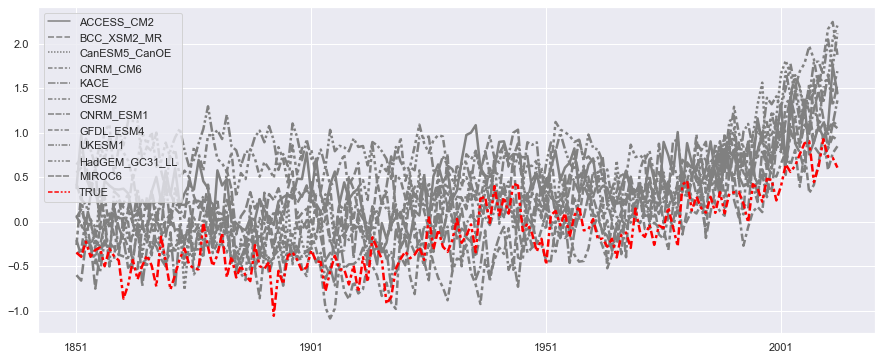

In [3]:
data.rename(index=lambda s: str(int(s) + 1851), inplace=True)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
palette = {c:'red' if c=='TRUE' else  'grey' for c in panel_data.model.unique()}

g=sns.lineplot(data=data, linewidth=2.5,palette=palette)
plt.xticks([0, 50, 100,150])


panel_data
plt.savefig('temp1')

In [4]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

def Kalman1D_plot(observations,damping=1):
    # To return the plot
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    plt.plot(pred_state)
    plt.plot(observations,linestyle='--',color='grey',linewidth=0.5)

def find_trend():
    trends ={}
    for i in panel_data['model']:
        XT1 = panel_data.loc[i].loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends) 
    return trend
    
#X0_trend = find_trend()
#X1_trend = pd.DataFrame.from_dict(Kalman1D(X1_all_plot).flatten())
X1_trend.T

<AxesSubplot:>

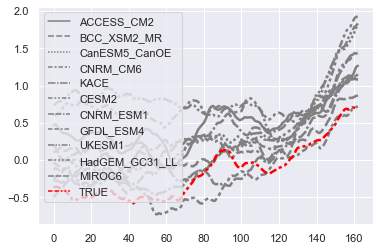

In [5]:
trend = find_trend()
sns.lineplot(data=trend, linewidth=2.5,palette=palette)  

In [6]:
trend

,ACCESS_CM2,BCC_XSM2_MR,CanESM5_CanOE,CNRM_CM6,KACE,CESM2,CNRM_ESM1,GFDL_ESM4,UKESM1,HadGEM_GC31_LL,MIROC6,TRUE
0,0.465615,-0.492257,0.008669,-0.132312,-0.264281,-0.030860,0.213367,-0.255787,0.735336,0.600677,0.107139,-0.356821
1,0.483548,-0.470378,-0.003789,-0.106144,-0.275785,-0.048467,0.171101,-0.234223,0.754395,0.610828,0.119451,-0.358584
2,0.452514,-0.429269,-0.012838,-0.122502,-0.276461,-0.066688,0.121068,-0.203660,0.777608,0.621598,0.130175,-0.356645
3,0.416934,-0.407476,-0.011689,-0.131600,-0.287442,-0.078243,0.063712,-0.197613,0.785375,0.630269,0.156004,-0.367811
4,0.387342,-0.403103,-0.014177,-0.123255,-0.299582,-0.099956,0.013350,-0.184373,0.791044,0.664406,0.168779,-0.376199
...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.086211,0.834462,1.606457,1.083166,1.400473,1.356925,1.113256,0.648426,1.694142,1.790452,1.134174,0.689228
159,1.124474,0.835827,1.653230,1.084049,1.412164,1.398871,1.100753,0.685230,1.733985,1.841868,1.125626,0.707312
160,1.180518,0.847436,1.705363,1.082344,1.431625,1.429957,1.087870,0.692006,1.782261,1.895787,1.113705,0.703613
161,1.248045,0.861730,1.771783,1.085830,1.429061,1.452834,1.085448,0.710125,1.804085,1.923116,1.130754,0.697302


In [7]:
from sklearn.metrics import mean_squared_error

def find_initial_errors(df):
    diction = dict()
    for (index, colname) in enumerate(df):
        diction[colname] = mean_squared_error(df[colname], df['TRUE'], squared='FALSE')
    print(diction)
    keys = list(diction.keys())
# get values in the same order as keys, and parse percentage values
    vals = [float(diction[k]) for k in keys]
    f, ax = plt.subplots(figsize=(15, 6))

    sns.barplot(x=keys, y=vals)
    return diction

{'ACCESS_CM2': 0.49331557789127595, 'BCC_XSM2_MR': 0.18684780471072399, 'CanESM5_CanOE': 0.3210646409663524, 'CNRM_CM6': 0.14410759688621047, 'KACE': 0.15026140306994745, 'CESM2': 0.26554959257373734, 'CNRM_ESM1': 0.2134831471840875, 'GFDL_ESM4': 0.21720294538433021, 'UKESM1': 1.1205402510203701, 'HadGEM_GC31_LL': 0.959958410216865, 'MIROC6': 0.3782243752391241, 'TRUE': 0.0}


,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,model
ACCESS_CM2,0.375954,0.973208,0.497969,0.357068,0.355483,0.075743,0.457747,0.404658,0.364769,0.359265,...,0.877988,1.331639,0.754243,0.893143,1.070729,0.946666,1.065684,1.747993,1.440901,ACCESS_CM2
BCC_XSM2_MR,-0.601654,-0.662668,-0.236120,-0.233272,-0.753469,-0.352483,-0.217083,-0.243474,-0.290667,-0.375541,...,0.771382,0.562137,1.137145,0.848418,0.772349,0.733400,0.820573,0.953064,0.918503,BCC_XSM2_MR
CanESM5_CanOE,0.070961,-0.037884,-0.114808,0.024674,-0.313223,0.342073,0.041480,-0.054697,0.089825,0.022939,...,1.484307,1.195094,1.546099,1.464548,1.579082,1.599628,1.562484,2.044906,2.201975,CanESM5_CanOE
CNRM_CM6,-0.263155,0.319128,-0.195107,-0.306039,-0.075585,-0.040837,-0.096191,0.090064,-0.148201,-0.279353,...,1.067770,1.397045,1.240175,0.899289,1.122791,1.109937,1.030424,1.123876,1.082332,CNRM_CM6
KACE,-0.206761,-0.384065,-0.173415,-0.275843,-0.398944,-0.570094,-0.213835,-0.354035,0.150916,-0.065190,...,1.173276,1.244752,1.361589,1.447278,1.636726,1.334453,1.651888,1.306054,1.536155,KACE
CESM2,0.057175,-0.042319,-0.133353,0.023327,-0.064955,-0.464965,0.064814,-0.452447,-0.422981,0.120920,...,1.224203,1.257094,1.517293,1.265665,1.108791,1.507458,1.512052,1.466749,1.689176,CESM2
CNRM_ESM1,0.424696,0.248771,0.194304,-0.006229,-0.238467,-0.277502,-0.013747,-0.504865,0.339638,0.290103,...,1.101596,1.184901,0.985517,1.596023,1.009894,1.104560,0.983257,1.093769,1.049651,CNRM_ESM1
GFDL_ESM4,-0.363606,-0.324211,0.041495,-0.269533,-0.468456,-0.063029,0.278416,-0.076807,0.196711,-0.371597,...,0.391741,0.796102,0.320017,0.413391,0.657472,0.985515,0.578576,0.767760,0.846035,GFDL_ESM4
UKESM1,0.640044,0.712845,0.932074,0.806349,0.632522,0.871653,0.699701,0.936906,0.815910,1.031701,...,1.511475,1.248112,1.406077,1.794811,1.795474,1.649651,2.046785,1.740632,2.113947,UKESM1
HadGEM_GC31_LL,0.549923,0.604639,0.642588,0.375610,0.591042,0.710176,1.019449,1.091706,0.507917,0.833559,...,1.688518,1.776143,1.970851,1.823069,1.507112,1.816843,2.161680,2.242140,1.872814,HadGEM_GC31_LL


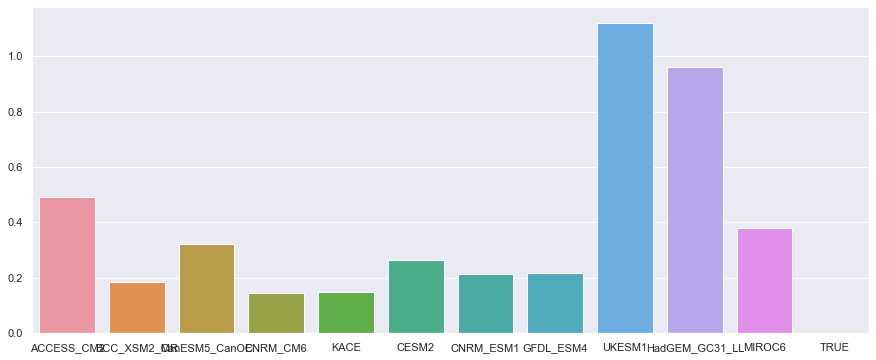

In [8]:

find_initial_errors(data)
panel_data

In [10]:
#projections
proj = pd.read_pickle('projections')
proj2 = pd.read_pickle('projections2')
X=proj

#pred = (X).dot(wasc)
true = 'Downloads/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
proj_true_temp=temp_mean[1979:]
print(proj_true_temp.shape)

proj_true_temp = np.average(proj_true_temp.reshape(-1, 3), axis=1)
proj =[]
for i in range(0,29,4):
    proj.append(proj_true_temp[i])

(87,)


In [11]:
proj_panel = X.T
proj_2014_2022 = proj_panel.loc[:,[i for i in list(range(0, 8))]].values


In [12]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

def Kalman1D_plot(observations,damping=1):
    # To return the plot
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.0001
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    plt.plot(pred_state)
    plt.plot(observations,linestyle='--',color='grey',linewidth=0.5)

def find_trend():
    trends ={}
    for i in range(0,11):
        XT1 = X0_all_plot[i]#.loc[i].loc[:,[i for i in list(range(0, 163))]].values.reshape(-1,1)
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends)
    return trend
    
  

In [13]:
import nlopt


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

date = np.arange(1850,2013)
tr = pd.DataFrame()
tr['date'] = date
tr['obs'] = X1_all_plot
tr['synthetic'] = (X0_all_plot.T).dot(W0)
tr.set_index(['date'])
tr
plot_acf(tr['obs'])
plt.savefig('auto')
plt.show()
plot_acf(tr['synthetic'])
plt.show()
results = adfuller(X1_all_plot)
print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

NameError: name 'X1_all_plot' is not defined

# Synthetic Controls

In [14]:
#first approach naive least square regression with no additional predictors 
#test with one of the models because current true temperature data do not seem correct
from scipy.optimize import fmin_slsqp
from sklearn.metrics import mean_squared_error



In [31]:

X1_all =  X1_trend
X0_all = X0_trend.T

#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(0, 163))]].values.T
X1_val = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
X0_double_int1 = X0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
X1_double_int1 = X1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
X0_100_163 = X0_all.loc[:,[i for i in list(range(100, 163))]].values.T
X1_100_163 = X1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
X0_double_int2= X0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
X1_double_int2 = X1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
X0_110_163 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_110_163 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)

X0_all_plot = X0_all.loc[:,[i for i in list(range(0, 171))]].values
#X0_all_plot = np.hstack((X0_all_plot,proj_2014_2022))
X1_all_plot = X1_all.loc[[i for i in list(range(0, 171))]].values.reshape(-1,1)


In [32]:
#X0_trend = find_trend()
#X1_trend = pd.DataFrame.from_dict(Kalman1D(X1_all_plot).flatten())
X1_trend.T

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,-0.356821,-0.358584,-0.356645,-0.367811,-0.376199,-0.390316,-0.41419,-0.429348,-0.456978,-0.491488,...,0.816083,0.851752,0.911994,0.979788,1.013403,1.024393,1.025099,1.024567,1.002068,0.996777


In [33]:
def w_mse(w,  x0, x1, v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)
def w_constraint(w,  x0, x1,v): return np.sum(w) - 1 

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w,  bounds=[(0, 1.0)]*len(w),f_eqcons=w_constraint, 
                                           args=( x0, x1,v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1,weight=False):
    k,j= X0.shape
    V = (1/k)*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)
    if weight:
        for i in range(0,k):
            V[i]=l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1)
   # print(W)
    #print(V)
    return V, W



In [34]:
def remain_error(W, df_donors,df_true, low_bound1,up_bound1,low_bound2,up_bound2):
    if(low_bound2 ==0):
        l = list(range(0, low_bound1))+list(range(up_bound1+1, 170))
    else:   
        l = list(range(0, low_bound1))+list(range(up_bound1+1, low_bound2)) +list(range(up_bound2+1, 170))
    df1 = df_true.loc[[i for i in l]].values.reshape(-1,1)
    df0 = df_donors.loc[:,[i for i in l]].values
    return mean_squared_error( df1,(df0.T).dot(W),squared=False) 
    

In [35]:
X0_all
X0_all = pd.DataFrame(X0_all_plot)
X1_all= pd.DataFrame(X1_all_plot)

mean squared reconstruction error using T=0-50:  0.13378157238104355
validation error:  0.4116802648889275
W: [3.21651622e-17 3.10054315e-17 0.00000000e+00 2.22044605e-16
 1.00000000e+00 3.67473780e-17 0.00000000e+00 3.83019833e-17
 0.00000000e+00 6.16229365e-18 3.10458309e-17]
mean squared reconstruction error using T=13-63, 113-163:  0.047801506470473897
validation error:  0.20124696296885372
W: [8.70577156e-17 4.47050382e-17 7.36655816e-17 6.38438419e-01
 2.65175080e-17 3.75311821e-17 0.00000000e+00 3.61561581e-01
 3.45242448e-17 5.52313936e-18 3.70893546e-17]
mean squared reconstruction error using T=100-163:  0.09093488409885214
validation error:  0.3740888519011585
W: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.78587029e-01
 0.00000000e+00 1.80307639e-17 0.00000000e+00 8.21412971e-01
 1.58793721e-17 4.27192307e-18 3.19336663e-17]
mean squared reconstruction error using T=100-150:  0.08197649314916121
validation error:  0.3347600880890806
W: [0.00000000e+00 1.58657373e-17 0.00

<Figure size 1260x324 with 0 Axes>

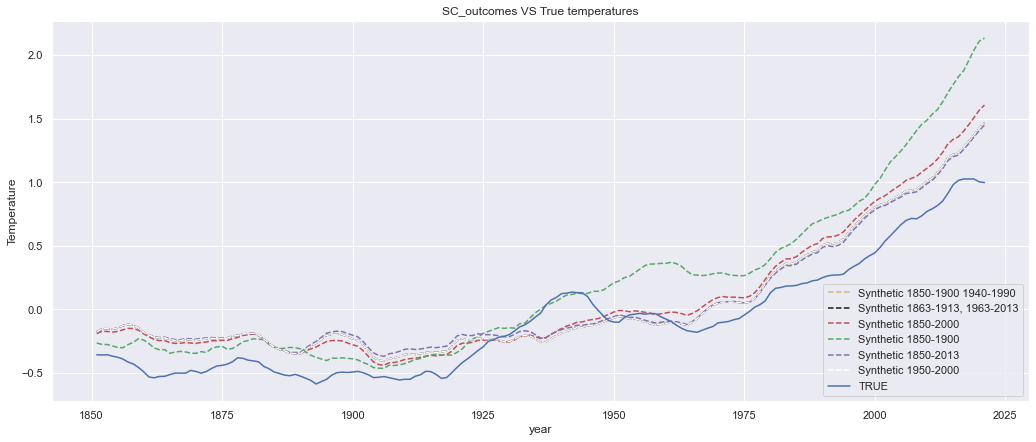

0.047801506470473897
[8.70577156e-17 4.47050382e-17 7.36655816e-17 6.38438419e-01
 2.65175080e-17 3.75311821e-17 0.00000000e+00 3.61561581e-01
 3.45242448e-17 5.52313936e-18 3.70893546e-17]


In [39]:
w = pd.DataFrame()

#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w['T=0-50'] = W

#use 13-63, 113-163
V0, W0 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1)
SC_outcomes0 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=3-63, 113-163'] = W0

#use 100-163
V0, W1 = solve_synthetic_control_basic(X0_100_163, X1_100_163)
SC_outcomes1 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w['T=100-163'] = W1

#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed)
SC_outcomes5 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w['T=100-150'] = W5

#use 90-140 0-50
V0, W2 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1)
SC_outcomes2 = (X0_all_plot.T).dot(W2)
true_outcomes = X1_all_plot
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w['T=90-140 0-50'] = W2




#use 0-150
V0, W4 = solve_synthetic_control_basic(X0_0_150, X1_0_150)
SC_outcomes4 = (X0_all_plot.T).dot(W4)
true_outcomes = X1_all_plot
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w['T=0-150'] = W4


#use all
#V0, W0_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,True)
#SC_outcomes_w = (X0_all_plot.T).dot(W0_weight)
#true_outcomes = X1_all_plot
#true_error = 0
#print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_weight)))
#print('validation error: - ')
#print('W:', W0_weight)
#w['T=0-163_w'] = W0_weight
fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,False)
SC_outcomes_all = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w['T=0-163'] = W0_no_weight
fig = plt.figure(figsize=(17.5,7)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),SC_outcomes,'g--', label="Synthetic 1850-1900");
plt.plot(range(1851,2022),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),SC_outcomes5,'w--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures")
plt.show()
fig.savefig("sc1_trend", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print(W0)

(87,)


NameError: name 'pred' is not defined

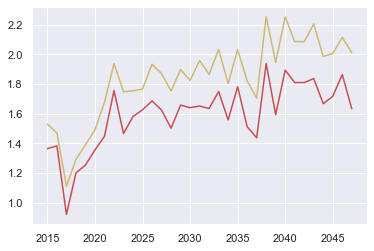

In [60]:

predicted_temp= (X).dot(W0_weight)
predicted_temp_no= (X).dot(W0_no_weight)

plt.plot(range(2015,2048),predicted_temp, 'r-', label="Synthetic weighted");
plt.plot(range(2015,2048),predicted_temp_no, 'y-', label="Synthetic");
plt.plot(range(2015,2048),pred, 'k-', label="Synthetic augmented");
plt.plot(range(2015,2023),proj, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE projections")
plt.savefig('projections')
plt.show()
print(proj)
print(mean_squared_error( np.array(proj),pred[:8],squared=False))

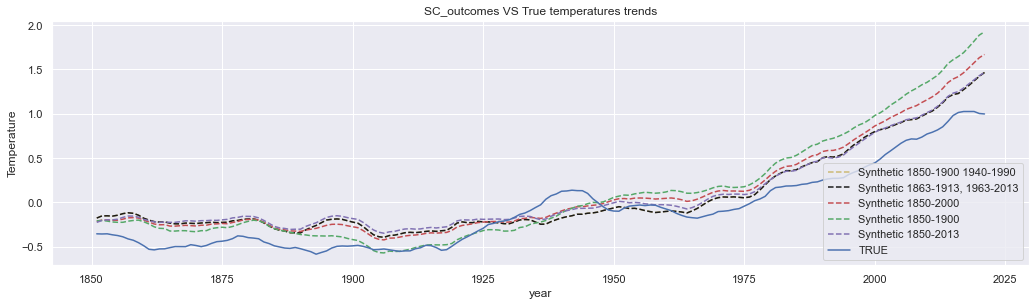

In [166]:
fig = plt.figure(figsize=(17.5,4.5))
plt.plot(range(1851,2022),(X0_trend).dot(W2),'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),(X0_trend).dot(W0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),(X0_trend).dot(W4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),(X0_trend).dot(W),'g--', label="Synthetic 1850-1900");
plt.plot(range(1851,2022),(X0_trend).dot(W0_no_weight),'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures trends")
fig.savefig("sc2", dpi=300)
plt.show()

mean squared reconstruction error using T=0-50:  0.12652224172186866
validation error:  0.3992482249960703
W: [6.80464139e-18 0.00000000e+00 4.54172406e-16 5.80787348e-02
 9.41921265e-01 3.18388764e-17 1.15039267e-17 0.00000000e+00
 0.00000000e+00 2.04128138e-18 4.12441548e-17]
mean squared reconstruction error using T=13-63, 113-163:  0.051500003706443025
validation error:  0.20446577790447767
W: [0.00000000e+00 5.57306123e-16 1.40121574e-16 4.67260279e-01
 2.16285041e-16 8.57283286e-17 1.61805330e-16 5.32739721e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
mean squared reconstruction error using T=100-163:  0.10623643705298791
validation error:  0.4054736064665685
W: [3.79267130e-18 1.32781128e-16 0.00000000e+00 1.10806232e-01
 4.88089770e-19 7.34053941e-18 0.00000000e+00 8.89193768e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
mean squared reconstruction error using T=100-150:  0.10074703626594912
validation error:  0.37268406982114505
W: [0.00000000e+00 1.22620853e-16 4.0

<Figure size 1260x324 with 0 Axes>

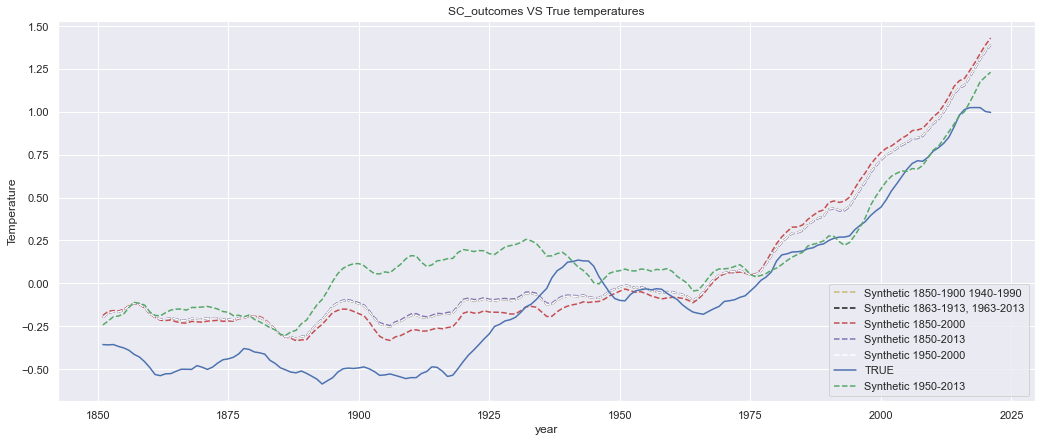

0.051500003706443025
[0.00000000e+00 5.57306123e-16 1.40121574e-16 4.67260279e-01
 2.16285041e-16 8.57283286e-17 1.61805330e-16 5.32739721e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [45]:
w1 = pd.DataFrame()

#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero,True)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w1['T=0-50'] = W

#use 13-63, 113-163
V0, W0 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1,True)
SC_outcomes0 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w1['T=3-63, 113-163'] = W0

#use 100-163
V0, W1 = solve_synthetic_control_basic(X0_100_163, X1_100_163,True)
SC_outcomes1 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w1['T=100-163'] = W1

#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed,True)
SC_outcomes5 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w1['T=100-150'] = W5

#use 90-140 0-50
V0, W2 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1,True)
SC_outcomes2 = (X0_all_plot.T).dot(W2)
true_outcomes = X1_all_plot
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w1['T=90-140 0-50'] = W2




#use 0-150
V0, W4 = solve_synthetic_control_basic(X0_0_150, X1_0_150,True)
SC_outcomes4 = (X0_all_plot.T).dot(W4)
true_outcomes = X1_all_plot
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w1['T=0-150'] = W4


fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,True)
SC_outcomes_all = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w1['T=0-163'] = W0_no_weight
fig = plt.figure(figsize=(17.5,7)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),SC_outcomes5,'w--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.plot(range(1851,2022),SC_outcomes1,'g--', label="Synthetic 1950-2013");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures")
plt.show()
fig.savefig("sc1_weight_trend", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print(W0)


In [116]:
X1 =  panel_data.loc['TRUE']
X0 = panel_data.loc[panel_data.index != 'TRUE', :]

X0_all_p = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_p = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot([0.00000000e+00, 6.54796064e-17, 1.14917706e-16 ,5.96047195e-01
 ,6.08766399e-17 ,9.71760481e-17, 0.00000000e+00 ,4.03952805e-01
, 0.00000000e+00 ,0.00000000e+00, 0.00000000e+00]),squared=False)
print(c)

0.21213978014711052


#  Augmented Synthetic controls

In [49]:
def w_mse(w,  x0, x1,v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w,  x0, x1,v): return np.sum(w) - 1

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=( x0, x1 , v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1):
    
    k,j= X0.shape
    V = 1/k*np.ones(k)
    for i in (1,k-1):
        V[i] +=V[i-1]
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1) 
    return V, W

In [50]:
def get_lambda_values(control,lambda_max, ratio=1e-8, number_lambda = 20):
    U , sing, V = svd(control)
    if (lambda_max==0):
        largest_l = sing[0]
    else:
         largest_l =lambda_max
    smallest = (ratio) * largest_l
    lambdas = np.linspace(smallest, largest_l, num=number_lambda, endpoint=True)
    return lambdas

In [51]:
def choose_lambda (lambdas, lambda_errors):
    # lambda with smallest error
    minpos = np.argmin(lambda_errors)
    min_error = min(lambda_errors)
    lambda_min = lambdas[minpos]
    return lambda_min

In [52]:
def objective(W,X0,X1,W_scm,l):
     return mean_squared_error(X1,(X0).dot(W))/l + mean_squared_error(W,W_scm)
    


In [53]:
def ridge_ASCM(X0,X1, holdout_length,ratio=1e-8, n_lambda = 20,lambda_max=0):
    V, synthetic_weights = solve_synthetic_control_basic(X0, X1)
    lamda =[]
    if (lamda==[]):
        lamda.append(cv_lambda(X0, X1,  holdout_length, 
                      lambda_max, ratio, n_lambda))
    W_Ridge = minimize(objective, synthetic_weights, method='nelder-mead', args =(X0,X1,synthetic_weights,lamda[0]),
               options={'xatol': 1e-7,'fatol':1e-7, 'disp': True})
    
    ## combine weights
    weights =  W_Ridge.x
    return weights


In [59]:
def cv_lambda(X0,X1, holdout_length,lambda_max, ratio=1e-8, n_lambda = 20):
    lambdas =  get_lambda_values(X0, lambda_max,ratio, n_lambda)
    print(lambdas)
    errors =np.zeros((X0.shape[0] - holdout_length-10, n_lambda))
    lambda_errors = np.zeros(n_lambda)
    lambda_errors_se = np.zeros(n_lambda)
    print(X0.shape)
    print(lambdas)

    for i in range(0,X0.shape[0] - holdout_length-10):
        X_0 = X0[:-i-holdout_length,:]
        print(X_0.shape)
        X_1 = X1[:-i-holdout_length]
        print(X_1.shape)
        X_0v = X0[X0.shape[0]-i-holdout_length:X0.shape[0]-i,:]
        print(X_0v.shape)

        X_1v = X1[X0.shape[0]-i-holdout_length:X0.shape[0]-i]

        V, synthetic_weights = solve_synthetic_control_basic(X_0, X_1)


        for j in range(0,n_lambda):
            ridge_weights =minimize(objective, synthetic_weights, method='nelder-mead', args =(X_0,X_1,synthetic_weights,lambdas[j]),
                   options={'maxiter':5000,'xatol': 1e-7,'fatol':1e-7, 'disp': True})
            print(ridge_weights.message,ridge_weights.status)
            aug_weights =  ridge_weights.x
            error = np.sum((X_1v - (X_0v).dot(aug_weights))**2)
          # take sum of errors across the holdout time periods
            errors[i][j] = error
          # lambda_errors[j] <- lambda_errors[j] + error
    print(errors)
    lambda_errors = np.mean(errors,axis=0)
    print(lambdas)
    l= choose_lambda (lambdas, lambda_errors)
    print(l)
    return l

In [101]:
wasc0 = ridge_ASCM(X0_double_int1, X1_double_int1,40)


wasc2 = ridge_ASCM(X0_double_int2, X1_double_int2,40)

wasc_weight = ridge_ASCM(X0_all_plot.T, X1_all_plot,40)

[1.91800964e-07 1.00947894e+00 2.01895769e+00 3.02843644e+00
 4.03791519e+00 5.04739394e+00 6.05687269e+00 7.06635144e+00
 8.07583019e+00 9.08530893e+00 1.00947877e+01 1.11042664e+01
 1.21137452e+01 1.31232239e+01 1.41327027e+01 1.51421814e+01
 1.61516602e+01 1.71611389e+01 1.81706177e+01 1.91800964e+01]
(100, 11)
[1.91800964e-07 1.00947894e+00 2.01895769e+00 3.02843644e+00
 4.03791519e+00 5.04739394e+00 6.05687269e+00 7.06635144e+00
 8.07583019e+00 9.08530893e+00 1.00947877e+01 1.11042664e+01
 1.21137452e+01 1.31232239e+01 1.41327027e+01 1.51421814e+01
 1.61516602e+01 1.71611389e+01 1.81706177e+01 1.91800964e+01]
(60, 11)
(60, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 2501.043631
         Iterations: 2108
         Function evaluations: 2991
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010653
         Iterations: 1275
         Function evaluations: 1854
Optimization terminated s

Optimization terminated successfully.
         Current function value: 0.009466
         Iterations: 1108
         Function evaluations: 1603
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006738
         Iterations: 1032
         Function evaluations: 1513
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005250
         Iterations: 1060
         Function evaluations: 1538
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004308
         Iterations: 804
         Function evaluations: 1183
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003657
         Iterations: 890
         Function evaluations: 1318
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003178
         Ite

Optimization terminated successfully.
         Current function value: 0.003052
         Iterations: 1347
         Function evaluations: 1924
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002704
         Iterations: 1333
         Function evaluations: 1926
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002428
         Iterations: 1350
         Function evaluations: 1928
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002204
         Iterations: 1365
         Function evaluations: 1952
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002018
         Iterations: 1186
         Function evaluations: 1696
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001862
         I

Optimization terminated successfully.
         Current function value: 0.001562
         Iterations: 1680
         Function evaluations: 2388
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001462
         Iterations: 1308
         Function evaluations: 1885
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001374
         Iterations: 908
         Function evaluations: 1300
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001296
         Iterations: 920
         Function evaluations: 1345
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001227
         Iterations: 951
         Function evaluations: 1386
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001165
         Iter

Optimization terminated successfully.
         Current function value: 0.001177
         Iterations: 922
         Function evaluations: 1348
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001119
         Iterations: 955
         Function evaluations: 1405
Optimization terminated successfully. 0
(51, 11)
(51, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 17561.741457
         Iterations: 1683
         Function evaluations: 2438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013204
         Iterations: 1021
         Function evaluations: 1498
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007821
         Iterations: 938
         Function evaluations: 1390
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.003951
         Iterations: 756
         Function evaluations: 1140
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003311
         Iterations: 837
         Function evaluations: 1245
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002855
         Iterations: 730
         Function evaluations: 1105
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002512
         Iterations: 886
         Function evaluations: 1308
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002244
         Iterations: 939
         Function evaluations: 1370
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002029
         Iterat

Optimization terminated successfully.
         Current function value: 0.001144
         Iterations: 741
         Function evaluations: 1104
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001078
         Iterations: 779
         Function evaluations: 1162
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001021
         Iterations: 764
         Function evaluations: 1141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000970
         Iterations: 679
         Function evaluations: 1032
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000925
         Iterations: 620
         Function evaluations: 931
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000885
         Iterati

Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 1933
         Function evaluations: 2691
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000946
         Iterations: 1606
         Function evaluations: 2270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000907
         Iterations: 1739
         Function evaluations: 2467
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000872
         Iterations: 1588
         Function evaluations: 2254
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000839
         Iterations: 1614
         Function evaluations: 2283
Optimization terminated successfully. 0
(44, 11)
(44, 1)
(40, 11)
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 4347.475717
         Iterations: 2768
         Function evaluations: 3902
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003457
         Iterations: 1431
         Function evaluations: 2071
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002382
         Iterations: 1428
         Function evaluations: 2060
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 1155
         Function evaluations: 1673
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001714
         Iterations: 1104
         Function evaluations: 1584
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001548
       

Optimization terminated successfully.
         Current function value: 0.002841
         Iterations: 552
         Function evaluations: 857
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002560
         Iterations: 667
         Function evaluations: 1003
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002330
         Iterations: 622
         Function evaluations: 961
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002139
         Iterations: 516
         Function evaluations: 817
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001976
         Iterations: 513
         Function evaluations: 807
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001837
         Iterations

Optimization terminated successfully.
         Current function value: 0.001041
         Iterations: 1101
         Function evaluations: 1588
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001001
         Iterations: 1100
         Function evaluations: 1603
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000964
         Iterations: 1205
         Function evaluations: 1749
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000930
         Iterations: 1367
         Function evaluations: 1974
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000898
         Iterations: 1448
         Function evaluations: 2068
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000869
         I

Optimization terminated successfully.
         Current function value: 0.001011
         Iterations: 1905
         Function evaluations: 2692
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000976
         Iterations: 2431
         Function evaluations: 3391
Optimization terminated successfully. 0
(35, 11)
(35, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 3428.807128
         Iterations: 1899
         Function evaluations: 2733
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002871
         Iterations: 1071
         Function evaluations: 1573
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002173
         Iterations: 1126
         Function evaluations: 1649
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.004707
         Iterations: 1524
         Function evaluations: 2151
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004056
         Iterations: 1228
         Function evaluations: 1764
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003565
         Iterations: 1453
         Function evaluations: 2085
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003181
         Iterations: 1497
         Function evaluations: 2132
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002872
         Iterations: 1919
         Function evaluations: 2718
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002618
         I

Optimization terminated successfully.
         Current function value: 0.001651
         Iterations: 1257
         Function evaluations: 1813
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001563
         Iterations: 1122
         Function evaluations: 1624
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001484
         Iterations: 1214
         Function evaluations: 1732
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001413
         Iterations: 1095
         Function evaluations: 1576
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001349
         Iterations: 993
         Function evaluations: 1468
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001291
         It

Optimization terminated successfully.
         Current function value: 0.001320
         Iterations: 534
         Function evaluations: 834
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001263
         Iterations: 542
         Function evaluations: 864
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001212
         Iterations: 556
         Function evaluations: 871
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001164
         Iterations: 502
         Function evaluations: 801
Optimization terminated successfully. 0
(28, 11)
(28, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 1345.734814
         Iterations: 2658
         Function evaluations: 3769
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value

Optimization terminated successfully.
         Current function value: 0.007610
         Iterations: 1579
         Function evaluations: 2250
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005751
         Iterations: 1633
         Function evaluations: 2343
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004722
         Iterations: 1280
         Function evaluations: 1846
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004027
         Iterations: 1146
         Function evaluations: 1656
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003517
         Iterations: 1430
         Function evaluations: 2047
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003125
         I

Optimization terminated successfully.
         Current function value: 0.001340
         Iterations: 1850
         Function evaluations: 2601
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001266
         Iterations: 1541
         Function evaluations: 2199
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001201
         Iterations: 1588
         Function evaluations: 2266
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001145
         Iterations: 1448
         Function evaluations: 2053
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001094
         Iterations: 1355
         Function evaluations: 1933
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001048
         I

Optimization terminated successfully.
         Current function value: 0.001288
         Iterations: 558
         Function evaluations: 869
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001225
         Iterations: 514
         Function evaluations: 818
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001169
         Iterations: 562
         Function evaluations: 877
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001118
         Iterations: 545
         Function evaluations: 851
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 513
         Function evaluations: 806
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001028
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000865
         Iterations: 1070
         Function evaluations: 1569
Optimization terminated successfully. 0
(19, 11)
(19, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 938.970908
         Iterations: 3518
         Function evaluations: 4979
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007853
         Iterations: 1834
         Function evaluations: 2594
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005765
         Iterations: 1822
         Function evaluations: 2597
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004605
         Iterations: 1527
         Function evaluations: 2194
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.002137
         Iterations: 966
         Function evaluations: 1410
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001944
         Iterations: 1136
         Function evaluations: 1653
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001786
         Iterations: 995
         Function evaluations: 1451
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001652
         Iterations: 995
         Function evaluations: 1460
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001538
         Iterations: 939
         Function evaluations: 1364
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001440
         Itera

Optimization terminated successfully.
         Current function value: 0.001149
         Iterations: 1661
         Function evaluations: 2335
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001093
         Iterations: 1395
         Function evaluations: 2001
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001042
         Iterations: 1601
         Function evaluations: 2270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000996
         Iterations: 1435
         Function evaluations: 2030
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000954
         Iterations: 1639
         Function evaluations: 2342
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000915
         I

Optimization terminated successfully.
         Current function value: 0.001029
         Iterations: 1355
         Function evaluations: 1940
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 1490
         Function evaluations: 2134
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000950
         Iterations: 1247
         Function evaluations: 1788
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000916
         Iterations: 1129
         Function evaluations: 1642
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000883
         Iterations: 1046
         Function evaluations: 1527
Optimization terminated successfully. 0
(12, 11)
(12, 1)
(40, 11)
Optimization terminated successfully.
         Current function 

[1.14099884e-07 6.00525812e-01 1.20105151e+00 1.80157721e+00
 2.40210290e+00 3.00262860e+00 3.60315430e+00 4.20368000e+00
 4.80420569e+00 5.40473139e+00 6.00525709e+00 6.60578279e+00
 7.20630848e+00 7.80683418e+00 8.40735988e+00 9.00788558e+00
 9.60841127e+00 1.02089370e+01 1.08094627e+01 1.14099884e+01]
(100, 11)
[1.14099884e-07 6.00525812e-01 1.20105151e+00 1.80157721e+00
 2.40210290e+00 3.00262860e+00 3.60315430e+00 4.20368000e+00
 4.80420569e+00 5.40473139e+00 6.00525709e+00 6.60578279e+00
 7.20630848e+00 7.80683418e+00 8.40735988e+00 9.00788558e+00
 9.60841127e+00 1.02089370e+01 1.08094627e+01 1.14099884e+01]
(60, 11)
(60, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 78628.236388
         Iterations: 779
         Function evaluations: 1185
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018141
         Iterations: 638
         Function evaluations: 981
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.009195
         Iterations: 1718
         Function evaluations: 2438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006428
         Iterations: 1353
         Function evaluations: 1918
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004992
         Iterations: 1103
         Function evaluations: 1576
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004106
         Iterations: 1509
         Function evaluations: 2121
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003500
         Iterations: 1250
         Function evaluations: 1778
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003058
         I

Optimization terminated successfully.
         Current function value: 0.002193
         Iterations: 1283
         Function evaluations: 1835
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001978
         Iterations: 1324
         Function evaluations: 1867
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001803
         Iterations: 1359
         Function evaluations: 1930
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001658
         Iterations: 1359
         Function evaluations: 1914
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001535
         Iterations: 1211
         Function evaluations: 1711
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001431
         I

Optimization terminated successfully.
         Current function value: 0.001388
         Iterations: 412
         Function evaluations: 662
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001302
         Iterations: 394
         Function evaluations: 631
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001225
         Iterations: 419
         Function evaluations: 666
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001158
         Iterations: 371
         Function evaluations: 605
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001097
         Iterations: 360
         Function evaluations: 585
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001043
         Iterations:

Optimization terminated successfully.
         Current function value: 0.013734
         Iterations: 847
         Function evaluations: 1260
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007313
         Iterations: 680
         Function evaluations: 1028
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005078
         Iterations: 913
         Function evaluations: 1353
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003925
         Iterations: 871
         Function evaluations: 1287
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003214
         Iterations: 633
         Function evaluations: 963
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002729
         Iterati

Optimization terminated successfully.
         Current function value: 0.002180
         Iterations: 1159
         Function evaluations: 1658
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001930
         Iterations: 1106
         Function evaluations: 1599
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001733
         Iterations: 987
         Function evaluations: 1446
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001575
         Iterations: 1056
         Function evaluations: 1522
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001444
         Iterations: 1000
         Function evaluations: 1452
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001334
         It

Optimization terminated successfully.
         Current function value: 0.001234
         Iterations: 909
         Function evaluations: 1322
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001155
         Iterations: 932
         Function evaluations: 1331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001085
         Iterations: 760
         Function evaluations: 1112
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001024
         Iterations: 776
         Function evaluations: 1141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000969
         Iterations: 774
         Function evaluations: 1120
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000920
         Iterat

Optimization terminated successfully.
         Current function value: 0.000986
         Iterations: 817
         Function evaluations: 1187
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000937
         Iterations: 715
         Function evaluations: 1051
Optimization terminated successfully. 0
(44, 11)
(44, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 13366.265611
         Iterations: 4136
         Function evaluations: 5751
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013352
         Iterations: 2835
         Function evaluations: 3968
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007254
         Iterations: 2269
         Function evaluations: 3199
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.004376
         Iterations: 1279
         Function evaluations: 1833
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003552
         Iterations: 1049
         Function evaluations: 1525
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002994
         Iterations: 1012
         Function evaluations: 1452
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002590
         Iterations: 938
         Function evaluations: 1343
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002284
         Iterations: 1179
         Function evaluations: 1692
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002044
         It

Optimization terminated successfully.
         Current function value: 0.002066
         Iterations: 771
         Function evaluations: 1124
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001874
         Iterations: 825
         Function evaluations: 1212
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001715
         Iterations: 842
         Function evaluations: 1235
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001581
         Iterations: 888
         Function evaluations: 1286
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001467
         Iterations: 783
         Function evaluations: 1139
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001369
         Iterat

Optimization terminated successfully.
         Current function value: 0.001410
         Iterations: 376
         Function evaluations: 611
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001326
         Iterations: 371
         Function evaluations: 602
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001251
         Iterations: 396
         Function evaluations: 637
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001184
         Iterations: 406
         Function evaluations: 657
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001124
         Iterations: 389
         Function evaluations: 638
Optimization terminated successfully. 0
(37, 11)
(37, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 379

Optimization terminated successfully.
         Current function value: 6421.522953
         Iterations: 2779
         Function evaluations: 3919
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014977
         Iterations: 2843
         Function evaluations: 3998
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008777
         Iterations: 2055
         Function evaluations: 2862
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006276
         Iterations: 1990
         Function evaluations: 2770
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004900
         Iterations: 1530
         Function evaluations: 2176
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004026
       

Optimization terminated successfully.
         Current function value: 0.003518
         Iterations: 922
         Function evaluations: 1333
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003049
         Iterations: 882
         Function evaluations: 1296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002692
         Iterations: 875
         Function evaluations: 1280
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002410
         Iterations: 781
         Function evaluations: 1142
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002182
         Iterations: 732
         Function evaluations: 1082
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001994
         Iterat

Optimization terminated successfully.
         Current function value: 0.001640
         Iterations: 730
         Function evaluations: 1048
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001525
         Iterations: 615
         Function evaluations: 917
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001426
         Iterations: 607
         Function evaluations: 914
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001338
         Iterations: 585
         Function evaluations: 873
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001261
         Iterations: 658
         Function evaluations: 978
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001193
         Iterations

Maximum number of iterations has been exceeded. 2
Optimization terminated successfully.
         Current function value: 0.013889
         Iterations: 2600
         Function evaluations: 3609
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007741
         Iterations: 1820
         Function evaluations: 2547
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005395
         Iterations: 1407
         Function evaluations: 1981
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004146
         Iterations: 1736
         Function evaluations: 2434
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003369
         Iterations: 1484
         Function evaluations: 2096
Optimization terminated successfully. 0
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.002202
         Iterations: 722
         Function evaluations: 1067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001933
         Iterations: 830
         Function evaluations: 1213
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001723
         Iterations: 727
         Function evaluations: 1063
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001554
         Iterations: 630
         Function evaluations: 936
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001415
         Iterations: 639
         Function evaluations: 935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001299
         Iteratio

Optimization terminated successfully.
         Current function value: 0.001069
         Iterations: 315
         Function evaluations: 520
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000998
         Iterations: 285
         Function evaluations: 482
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000936
         Iterations: 300
         Function evaluations: 500
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000881
         Iterations: 294
         Function evaluations: 486
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000833
         Iterations: 287
         Function evaluations: 477
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000789
         Iterations:

Optimization terminated successfully.
         Current function value: 1702.374704
         Iterations: 4098
         Function evaluations: 5760
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011440
         Iterations: 1539
         Function evaluations: 2201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006106
         Iterations: 1403
         Function evaluations: 1994
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004173
         Iterations: 1148
         Function evaluations: 1647
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003172
         Iterations: 984
         Function evaluations: 1408
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002559
        

Optimization terminated successfully.
         Current function value: 0.002523
         Iterations: 1219
         Function evaluations: 1734
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002116
         Iterations: 940
         Function evaluations: 1345
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001822
         Iterations: 1121
         Function evaluations: 1612
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001600
         Iterations: 1239
         Function evaluations: 1751
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001427
         Iterations: 974
         Function evaluations: 1414
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001288
         Ite

Optimization terminated successfully.
         Current function value: 0.001044
         Iterations: 504
         Function evaluations: 753
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000970
         Iterations: 497
         Function evaluations: 756
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 584
         Function evaluations: 876
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000850
         Iterations: 441
         Function evaluations: 679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000800
         Iterations: 544
         Function evaluations: 826
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000756
         Iterations:

Optimization terminated successfully.
         Current function value: 24266.530612
         Iterations: 993
         Function evaluations: 1492
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010838
         Iterations: 482
         Function evaluations: 764
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005680
         Iterations: 398
         Function evaluations: 646
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003854
         Iterations: 407
         Function evaluations: 664
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002917
         Iterations: 402
         Function evaluations: 655
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002347
         Iterat

Optimization terminated successfully.
         Current function value: 0.002057
         Iterations: 437
         Function evaluations: 687
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001771
         Iterations: 479
         Function evaluations: 737
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001554
         Iterations: 565
         Function evaluations: 863
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001385
         Iterations: 485
         Function evaluations: 769
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001249
         Iterations: 449
         Function evaluations: 703
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001137
         Iterations:

[2.63379125e-07 1.38620617e+00 2.77241208e+00 4.15861799e+00
 5.54482389e+00 6.93102980e+00 8.31723571e+00 9.70344161e+00
 1.10896475e+01 1.24758534e+01 1.38620593e+01 1.52482652e+01
 1.66344712e+01 1.80206771e+01 1.94068830e+01 2.07930889e+01
 2.21792948e+01 2.35655007e+01 2.49517066e+01 2.63379125e+01]
(171, 11)
[2.63379125e-07 1.38620617e+00 2.77241208e+00 4.15861799e+00
 5.54482389e+00 6.93102980e+00 8.31723571e+00 9.70344161e+00
 1.10896475e+01 1.24758534e+01 1.38620593e+01 1.52482652e+01
 1.66344712e+01 1.80206771e+01 1.94068830e+01 2.07930889e+01
 2.21792948e+01 2.35655007e+01 2.49517066e+01 2.63379125e+01]
(131, 11)
(131, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 21249.365582
         Iterations: 3207
         Function evaluations: 4522
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013884
         Iterations: 2056
         Function evaluations: 2905
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.016731
         Iterations: 2864
         Function evaluations: 3978
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009089
         Iterations: 2775
         Function evaluations: 3844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006281
         Iterations: 2550
         Function evaluations: 3573
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004809
         Iterations: 1905
         Function evaluations: 2685
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003900
         Iterations: 1895
         Function evaluations: 2672
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003281
         I

Optimization terminated successfully.
         Current function value: 0.003009
         Iterations: 810
         Function evaluations: 1207
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002616
         Iterations: 998
         Function evaluations: 1446
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002316
         Iterations: 952
         Function evaluations: 1378
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002078
         Iterations: 757
         Function evaluations: 1123
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001885
         Iterations: 836
         Function evaluations: 1219
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001725
         Iterat

Optimization terminated successfully.
         Current function value: 0.001553
         Iterations: 654
         Function evaluations: 960
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001444
         Iterations: 685
         Function evaluations: 1017
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001349
         Iterations: 726
         Function evaluations: 1092
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001266
         Iterations: 778
         Function evaluations: 1143
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001192
         Iterations: 856
         Function evaluations: 1257
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001127
         Iterati

Optimization terminated successfully.
         Current function value: 0.001024
         Iterations: 1067
         Function evaluations: 1535
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000974
         Iterations: 985
         Function evaluations: 1413
Optimization terminated successfully. 0
(122, 11)
(122, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 30857.546880
         Iterations: 2626
         Function evaluations: 3694
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013582
         Iterations: 1278
         Function evaluations: 1832
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007576
         Iterations: 1548
         Function evaluations: 2198
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.004876
         Iterations: 1730
         Function evaluations: 2421
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003805
         Iterations: 1511
         Function evaluations: 2136
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003132
         Iterations: 1441
         Function evaluations: 2048
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002668
         Iterations: 1575
         Function evaluations: 2221
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002327
         Iterations: 1602
         Function evaluations: 2263
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002066
         I

Optimization terminated successfully.
         Current function value: 0.001860
         Iterations: 1810
         Function evaluations: 2564
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001690
         Iterations: 1209
         Function evaluations: 1723
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001548
         Iterations: 1157
         Function evaluations: 1661
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001429
         Iterations: 1095
         Function evaluations: 1544
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001327
         Iterations: 1384
         Function evaluations: 1955
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001239
         I

Optimization terminated successfully.
         Current function value: 0.001217
         Iterations: 1214
         Function evaluations: 1722
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001141
         Iterations: 979
         Function evaluations: 1407
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001073
         Iterations: 1282
         Function evaluations: 1851
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001014
         Iterations: 1090
         Function evaluations: 1559
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000960
         Iterations: 914
         Function evaluations: 1325
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000912
         Ite

Optimization terminated successfully.
         Current function value: 0.000874
         Iterations: 1138
         Function evaluations: 1636
Optimization terminated successfully. 0
(113, 11)
(113, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 35859.716745
         Iterations: 2536
         Function evaluations: 3557
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014227
         Iterations: 1704
         Function evaluations: 2401
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007608
         Iterations: 1873
         Function evaluations: 2671
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005228
         Iterations: 1397
         Function evaluations: 2006
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fun

Optimization terminated successfully.
         Current function value: 0.002624
         Iterations: 589
         Function evaluations: 917
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002260
         Iterations: 466
         Function evaluations: 737
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001985
         Iterations: 617
         Function evaluations: 934
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001770
         Iterations: 431
         Function evaluations: 704
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001597
         Iterations: 412
         Function evaluations: 666
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001455
         Iterations:

Optimization terminated successfully.
         Current function value: 0.001173
         Iterations: 1241
         Function evaluations: 1756
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 918
         Function evaluations: 1337
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001019
         Iterations: 1070
         Function evaluations: 1553
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000956
         Iterations: 1182
         Function evaluations: 1725
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 1060
         Function evaluations: 1555
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000851
         It

Optimization terminated successfully.
         Current function value: 0.000757
         Iterations: 991
         Function evaluations: 1438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000720
         Iterations: 1219
         Function evaluations: 1727
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000686
         Iterations: 1281
         Function evaluations: 1820
Optimization terminated successfully. 0
(106, 11)
(106, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 7204.356578
         Iterations: 1735
         Function evaluations: 2470
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008068
         Iterations: 1256
         Function evaluations: 1819
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.004485
         Iterations: 3107
         Function evaluations: 4315
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003283
         Iterations: 3048
         Function evaluations: 4239
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002612
         Iterations: 2803
         Function evaluations: 3894
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002180
         Iterations: 2866
         Function evaluations: 4000
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001875
         Iterations: 2635
         Function evaluations: 3662
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001648
         I

Optimization terminated successfully.
         Current function value: 0.001580
         Iterations: 1957
         Function evaluations: 2772
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001412
         Iterations: 1961
         Function evaluations: 2760
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001278
         Iterations: 1514
         Function evaluations: 2128
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001167
         Iterations: 1925
         Function evaluations: 2742
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001075
         Iterations: 1658
         Function evaluations: 2313
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000997
         I

Optimization terminated successfully.
         Current function value: 0.000885
         Iterations: 792
         Function evaluations: 1177
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000828
         Iterations: 687
         Function evaluations: 1033
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000779
         Iterations: 702
         Function evaluations: 1052
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000735
         Iterations: 736
         Function evaluations: 1093
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 891
         Function evaluations: 1307
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000660
         Iterat

Optimization terminated successfully.
         Current function value: 0.000592
         Iterations: 988
         Function evaluations: 1422
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000565
         Iterations: 1018
         Function evaluations: 1506
Optimization terminated successfully. 0
(97, 11)
(97, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 4049.760761
         Iterations: 4193
         Function evaluations: 5803
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004835
         Iterations: 2488
         Function evaluations: 3480
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003200
         Iterations: 3044
         Function evaluations: 4238
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.001678
         Iterations: 929
         Function evaluations: 1374
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001434
         Iterations: 967
         Function evaluations: 1428
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001260
         Iterations: 858
         Function evaluations: 1256
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001128
         Iterations: 1005
         Function evaluations: 1456
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001024
         Iterations: 993
         Function evaluations: 1441
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000939
         Itera

Optimization terminated successfully.
         Current function value: 0.000953
         Iterations: 894
         Function evaluations: 1327
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000886
         Iterations: 955
         Function evaluations: 1389
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000828
         Iterations: 975
         Function evaluations: 1422
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000778
         Iterations: 753
         Function evaluations: 1110
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000733
         Iterations: 692
         Function evaluations: 1041
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000694
         Iterat

Optimization terminated successfully.
         Current function value: 0.000700
         Iterations: 1194
         Function evaluations: 1684
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 1544
         Function evaluations: 2183
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000633
         Iterations: 1306
         Function evaluations: 1844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000605
         Iterations: 1322
         Function evaluations: 1891
Optimization terminated successfully. 0
(90, 11)
(90, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 5539.714427
         Iterations: 3056
         Function evaluations: 4290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.002593
         Iterations: 1079
         Function evaluations: 1573
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001975
         Iterations: 1024
         Function evaluations: 1497
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001629
         Iterations: 1196
         Function evaluations: 1734
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001403
         Iterations: 975
         Function evaluations: 1420
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001240
         Iterations: 935
         Function evaluations: 1377
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001116
         Ite

Optimization terminated successfully.
         Current function value: 0.001239
         Iterations: 794
         Function evaluations: 1177
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001127
         Iterations: 669
         Function evaluations: 1017
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001035
         Iterations: 801
         Function evaluations: 1203
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000958
         Iterations: 741
         Function evaluations: 1124
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000892
         Iterations: 654
         Function evaluations: 979
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000835
         Iterati

Optimization terminated successfully.
         Current function value: 0.000869
         Iterations: 655
         Function evaluations: 994
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 556
         Function evaluations: 866
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000772
         Iterations: 559
         Function evaluations: 850
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 549
         Function evaluations: 848
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 512
         Function evaluations: 783
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000661
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000662
         Iterations: 1440
         Function evaluations: 2033
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000633
         Iterations: 1537
         Function evaluations: 2167
Optimization terminated successfully. 0
(81, 11)
(81, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 3763.580943
         Iterations: 2916
         Function evaluations: 4104
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005196
         Iterations: 2639
         Function evaluations: 3722
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003279
         Iterations: 2411
         Function evaluations: 3331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.003324
         Iterations: 1793
         Function evaluations: 2538
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002678
         Iterations: 1573
         Function evaluations: 2236
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002250
         Iterations: 1553
         Function evaluations: 2187
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001943
         Iterations: 1703
         Function evaluations: 2413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001712
         Iterations: 1507
         Function evaluations: 2154
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001531
         I

Optimization terminated successfully.
         Current function value: 0.001550
         Iterations: 1612
         Function evaluations: 2264
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001404
         Iterations: 1401
         Function evaluations: 2009
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001283
         Iterations: 1374
         Function evaluations: 1938
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001182
         Iterations: 1596
         Function evaluations: 2242
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001096
         Iterations: 1835
         Function evaluations: 2608
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001021
         I

Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 1775
         Function evaluations: 2530
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000790
         Iterations: 1896
         Function evaluations: 2688
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000750
         Iterations: 1656
         Function evaluations: 2331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000714
         Iterations: 1985
         Function evaluations: 2780
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000682
         Iterations: 1449
         Function evaluations: 2054
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000653
         I

Optimization terminated successfully.
         Current function value: 0.000712
         Iterations: 734
         Function evaluations: 1098
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000681
         Iterations: 720
         Function evaluations: 1069
Optimization terminated successfully. 0
(72, 11)
(72, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 6718.675713
         Iterations: 1056
         Function evaluations: 1572
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007740
         Iterations: 695
         Function evaluations: 1044
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004881
         Iterations: 588
         Function evaluations: 908
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 0.002433
         Iterations: 2602
         Function evaluations: 3593
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002064
         Iterations: 2959
         Function evaluations: 4135
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001805
         Iterations: 3966
         Function evaluations: 5440
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001613
         Iterations: 2378
         Function evaluations: 3304
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001457
         Iterations: 2726
         Function evaluations: 3821
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001332
         I

Optimization terminated successfully.
         Current function value: 0.001151
         Iterations: 702
         Function evaluations: 1066
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001072
         Iterations: 836
         Function evaluations: 1240
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001004
         Iterations: 722
         Function evaluations: 1086
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000945
         Iterations: 618
         Function evaluations: 953
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000892
         Iterations: 829
         Function evaluations: 1218
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000846
         Iterati

Optimization terminated successfully.
         Current function value: 0.000724
         Iterations: 985
         Function evaluations: 1435
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 884
         Function evaluations: 1290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000665
         Iterations: 787
         Function evaluations: 1143
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000639
         Iterations: 867
         Function evaluations: 1261
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000616
         Iterations: 831
         Function evaluations: 1212
Optimization terminated successfully. 0
(65, 11)
(65, 1)
(40, 11)
Optimization terminated successfully.
         Current function value

Optimization terminated successfully.
         Current function value: 4211.861918
         Iterations: 1878
         Function evaluations: 2669
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003804
         Iterations: 1498
         Function evaluations: 2137
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002650
         Iterations: 1521
         Function evaluations: 2186
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002154
         Iterations: 1174
         Function evaluations: 1678
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001854
         Iterations: 1217
         Function evaluations: 1735
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001643
       

Optimization terminated successfully.
         Current function value: 0.001350
         Iterations: 2088
         Function evaluations: 2935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001233
         Iterations: 1923
         Function evaluations: 2707
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001140
         Iterations: 1752
         Function evaluations: 2458
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001062
         Iterations: 1989
         Function evaluations: 2807
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000996
         Iterations: 1666
         Function evaluations: 2382
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000938
         I

Optimization terminated successfully.
         Current function value: 0.001302
         Iterations: 909
         Function evaluations: 1350
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001213
         Iterations: 896
         Function evaluations: 1326
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001136
         Iterations: 707
         Function evaluations: 1070
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001069
         Iterations: 937
         Function evaluations: 1382
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001009
         Iterations: 962
         Function evaluations: 1424
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000955
         Iterat

Optimization terminated successfully.
         Current function value: 0.001044
         Iterations: 700
         Function evaluations: 1031
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 821
         Function evaluations: 1204
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000938
         Iterations: 640
         Function evaluations: 968
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000892
         Iterations: 705
         Function evaluations: 1065
Optimization terminated successfully. 0
(56, 11)
(56, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 2586.947642
         Iterations: 1894
         Function evaluations: 2727
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 0.007922
         Iterations: 1768
         Function evaluations: 2539
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005419
         Iterations: 1247
         Function evaluations: 1799
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004183
         Iterations: 1326
         Function evaluations: 1896
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003420
         Iterations: 1363
         Function evaluations: 1958
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002896
         Iterations: 1565
         Function evaluations: 2244
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002513
         I

Optimization terminated successfully.
         Current function value: 0.001753
         Iterations: 978
         Function evaluations: 1438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001606
         Iterations: 932
         Function evaluations: 1358
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001483
         Iterations: 1016
         Function evaluations: 1489
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001378
         Iterations: 1254
         Function evaluations: 1782
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001287
         Iterations: 1430
         Function evaluations: 2020
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001207
         Ite

Optimization terminated successfully.
         Current function value: 0.001084
         Iterations: 2073
         Function evaluations: 2916
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001028
         Iterations: 1827
         Function evaluations: 2558
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 1899
         Function evaluations: 2660
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000932
         Iterations: 1195
         Function evaluations: 1689
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000890
         Iterations: 948
         Function evaluations: 1365
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000853
         It

Optimization terminated successfully.
         Current function value: 0.001129
         Iterations: 453
         Function evaluations: 713
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001071
         Iterations: 485
         Function evaluations: 761
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001019
         Iterations: 560
         Function evaluations: 858
Optimization terminated successfully. 0
(47, 11)
(47, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 3340.573545
         Iterations: 1695
         Function evaluations: 2464
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002991
         Iterations: 1203
         Function evaluations: 1747
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function val

Optimization terminated successfully.
         Current function value: 0.005746
         Iterations: 997
         Function evaluations: 1453
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004486
         Iterations: 919
         Function evaluations: 1339
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003695
         Iterations: 991
         Function evaluations: 1454
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003146
         Iterations: 1031
         Function evaluations: 1499
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002741
         Iterations: 1012
         Function evaluations: 1493
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002429
         Iter

Optimization terminated successfully.
         Current function value: 0.002154
         Iterations: 893
         Function evaluations: 1313
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001958
         Iterations: 956
         Function evaluations: 1393
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001795
         Iterations: 1329
         Function evaluations: 1883
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001657
         Iterations: 1507
         Function evaluations: 2177
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001539
         Iterations: 1258
         Function evaluations: 1796
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001437
         Ite

Optimization terminated successfully.
         Current function value: 0.001150
         Iterations: 1276
         Function evaluations: 1819
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001091
         Iterations: 772
         Function evaluations: 1118
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001037
         Iterations: 825
         Function evaluations: 1215
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000988
         Iterations: 842
         Function evaluations: 1243
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000944
         Iterations: 823
         Function evaluations: 1199
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000904
         Itera

Optimization terminated successfully.
         Current function value: 3107.431148
         Iterations: 3191
         Function evaluations: 4519
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003092
         Iterations: 1604
         Function evaluations: 2287
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002193
         Iterations: 1447
         Function evaluations: 2071
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001829
         Iterations: 1506
         Function evaluations: 2125
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001611
         Iterations: 1653
         Function evaluations: 2342
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001457
       

Optimization terminated successfully.
         Current function value: 0.001613
         Iterations: 1051
         Function evaluations: 1525
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001483
         Iterations: 836
         Function evaluations: 1244
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001374
         Iterations: 722
         Function evaluations: 1084
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001280
         Iterations: 875
         Function evaluations: 1304
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001200
         Iterations: 843
         Function evaluations: 1253
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001129
         Itera

Optimization terminated successfully.
         Current function value: 0.000897
         Iterations: 979
         Function evaluations: 1432
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000855
         Iterations: 1167
         Function evaluations: 1693
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000818
         Iterations: 711
         Function evaluations: 1072
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000783
         Iterations: 614
         Function evaluations: 938
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000751
         Iterations: 711
         Function evaluations: 1062
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000722
         Iterat

Optimization terminated successfully.
         Current function value: 0.000661
         Iterations: 706
         Function evaluations: 1064
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000637
         Iterations: 847
         Function evaluations: 1256
Optimization terminated successfully. 0
(31, 11)
(31, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 3706.549684
         Iterations: 2041
         Function evaluations: 2925
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004003
         Iterations: 1357
         Function evaluations: 1961
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002886
         Iterations: 891
         Function evaluations: 1319
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 0.002227
         Iterations: 1089
         Function evaluations: 1587
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001966
         Iterations: 994
         Function evaluations: 1454
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001764
         Iterations: 993
         Function evaluations: 1456
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001603
         Iterations: 758
         Function evaluations: 1122
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001470
         Iterations: 840
         Function evaluations: 1229
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001358
         Itera

Optimization terminated successfully.
         Current function value: 0.001409
         Iterations: 1041
         Function evaluations: 1506
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001310
         Iterations: 1289
         Function evaluations: 1839
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001224
         Iterations: 1259
         Function evaluations: 1822
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001149
         Iterations: 1355
         Function evaluations: 1926
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001083
         Iterations: 1263
         Function evaluations: 1828
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001024
         I

Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 713
         Function evaluations: 1062
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000931
         Iterations: 693
         Function evaluations: 1036
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000888
         Iterations: 857
         Function evaluations: 1274
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000850
         Iterations: 839
         Function evaluations: 1246
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000815
         Iterations: 880
         Function evaluations: 1292
Optimization terminated successfully. 0
(24, 11)
(24, 1)
(40, 11)
Optimization terminated successfully.
         Current function value

Optimization terminated successfully.
         Current function value: 218.398279
         Iterations: 3896
         Function evaluations: 5480
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003268
         Iterations: 3568
         Function evaluations: 4953
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002266
         Iterations: 2422
         Function evaluations: 3413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001866
         Iterations: 3138
         Function evaluations: 4357
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001630
         Iterations: 2737
         Function evaluations: 3787
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001467
        

Optimization terminated successfully.
         Current function value: 0.001690
         Iterations: 869
         Function evaluations: 1285
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001549
         Iterations: 733
         Function evaluations: 1095
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001432
         Iterations: 739
         Function evaluations: 1100
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001333
         Iterations: 841
         Function evaluations: 1261
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001248
         Iterations: 912
         Function evaluations: 1339
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001173
         Iterat

Optimization terminated successfully.
         Current function value: 0.001048
         Iterations: 2174
         Function evaluations: 3047
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000995
         Iterations: 2307
         Function evaluations: 3228
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000947
         Iterations: 2178
         Function evaluations: 3063
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000905
         Iterations: 1991
         Function evaluations: 2812
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000866
         Iterations: 1572
         Function evaluations: 2223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000830
         I

Optimization terminated successfully.
         Current function value: 0.001188
         Iterations: 839
         Function evaluations: 1243
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001125
         Iterations: 872
         Function evaluations: 1274
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001068
         Iterations: 844
         Function evaluations: 1243
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001017
         Iterations: 886
         Function evaluations: 1289
Optimization terminated successfully. 0
(15, 11)
(15, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 419.643573
         Iterations: 2437
         Function evaluations: 3438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 0.007022
         Iterations: 1891
         Function evaluations: 2686
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004367
         Iterations: 2002
         Function evaluations: 2814
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003326
         Iterations: 1804
         Function evaluations: 2554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002740
         Iterations: 1752
         Function evaluations: 2498
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002352
         Iterations: 965
         Function evaluations: 1418
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002072
         It

Optimization terminated successfully.
         Current function value: 0.001829
         Iterations: 1196
         Function evaluations: 1728
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001609
         Iterations: 1264
         Function evaluations: 1827
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001439
         Iterations: 1244
         Function evaluations: 1777
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001303
         Iterations: 1258
         Function evaluations: 1812
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001191
         Iterations: 1484
         Function evaluations: 2111
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001098
         I

In [104]:
wasc1 = ridge_ASCM(X0_100_163, X1_100_163,10)
wasc4 = ridge_ASCM(X0_0_150, X1_0_150,20)


[1.93250773e-07 1.01710952e+00 2.03421884e+00 3.05132816e+00
 4.06843748e+00 5.08554681e+00 6.10265613e+00 7.11976545e+00
 8.13687478e+00 9.15398410e+00 1.01710934e+01 1.11882027e+01
 1.22053121e+01 1.32224214e+01 1.42395307e+01 1.52566400e+01
 1.62737494e+01 1.72908587e+01 1.83079680e+01 1.93250773e+01]
(63, 11)
[1.93250773e-07 1.01710952e+00 2.03421884e+00 3.05132816e+00
 4.06843748e+00 5.08554681e+00 6.10265613e+00 7.11976545e+00
 8.13687478e+00 9.15398410e+00 1.01710934e+01 1.11882027e+01
 1.22053121e+01 1.32224214e+01 1.42395307e+01 1.52566400e+01
 1.62737494e+01 1.72908587e+01 1.83079680e+01 1.93250773e+01]
(53, 11)
(53, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 8488.244335
         Iterations: 1099
         Function evaluations: 1615
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005720
         Iterations: 936
         Function evaluations: 1395
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.003170
         Iterations: 1039
         Function evaluations: 1526
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002279
         Iterations: 1023
         Function evaluations: 1474
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001800
         Iterations: 1116
         Function evaluations: 1603
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001498
         Iterations: 827
         Function evaluations: 1209
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001289
         Iterations: 1022
         Function evaluations: 1493
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001135
         It

Optimization terminated successfully.
         Current function value: 0.001449
         Iterations: 518
         Function evaluations: 806
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001278
         Iterations: 564
         Function evaluations: 869
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001144
         Iterations: 504
         Function evaluations: 791
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001036
         Iterations: 547
         Function evaluations: 844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000946
         Iterations: 533
         Function evaluations: 832
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000871
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000658
         Iterations: 851
         Function evaluations: 1243
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000617
         Iterations: 640
         Function evaluations: 971
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000582
         Iterations: 743
         Function evaluations: 1100
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000550
         Iterations: 651
         Function evaluations: 983
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000522
         Iterations: 646
         Function evaluations: 949
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000496
         Iteration

Optimization terminated successfully.
         Current function value: 0.000427
         Iterations: 1554
         Function evaluations: 2200
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000409
         Iterations: 1074
         Function evaluations: 1542
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000392
         Iterations: 1702
         Function evaluations: 2369
Optimization terminated successfully. 0
(44, 11)
(44, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 3431.894296
         Iterations: 2861
         Function evaluations: 4012
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003945
         Iterations: 1656
         Function evaluations: 2353
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.001682
         Iterations: 566
         Function evaluations: 880
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001429
         Iterations: 607
         Function evaluations: 941
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001248
         Iterations: 522
         Function evaluations: 819
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001110
         Iterations: 519
         Function evaluations: 813
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001001
         Iterations: 502
         Function evaluations: 797
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000913
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000802
         Iterations: 855
         Function evaluations: 1265
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000744
         Iterations: 832
         Function evaluations: 1227
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 691
         Function evaluations: 1013
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000651
         Iterations: 614
         Function evaluations: 919
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000613
         Iterations: 587
         Function evaluations: 889
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000579
         Iteratio

Optimization terminated successfully.
         Current function value: 0.000514
         Iterations: 859
         Function evaluations: 1248
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000489
         Iterations: 831
         Function evaluations: 1201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000466
         Iterations: 900
         Function evaluations: 1300
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000446
         Iterations: 814
         Function evaluations: 1201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000427
         Iterations: 996
         Function evaluations: 1436
Optimization terminated successfully. 0
(37, 11)
(37, 1)
(10, 11)
Optimization terminated successfully.
         Current function value

Optimization terminated successfully.
         Current function value: 7693.800355
         Iterations: 1889
         Function evaluations: 2697
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004401
         Iterations: 1085
         Function evaluations: 1575
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002531
         Iterations: 1120
         Function evaluations: 1611
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001859
         Iterations: 1173
         Function evaluations: 1687
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001499
         Iterations: 858
         Function evaluations: 1277
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001268
        

Optimization terminated successfully.
         Current function value: 0.001078
         Iterations: 792
         Function evaluations: 1176
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000957
         Iterations: 754
         Function evaluations: 1140
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000862
         Iterations: 732
         Function evaluations: 1089
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 761
         Function evaluations: 1131
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 649
         Function evaluations: 986
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000669
         Iterati

Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 903
         Function evaluations: 1314
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000619
         Iterations: 815
         Function evaluations: 1213
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000578
         Iterations: 743
         Function evaluations: 1080
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000542
         Iterations: 739
         Function evaluations: 1097
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000511
         Iterations: 853
         Function evaluations: 1231
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000483
         Iterat

Optimization terminated successfully.
         Current function value: 0.000488
         Iterations: 370
         Function evaluations: 603
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000463
         Iterations: 361
         Function evaluations: 590
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000440
         Iterations: 376
         Function evaluations: 611
Optimization terminated successfully. 0
(28, 11)
(28, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 3401.459328
         Iterations: 1291
         Function evaluations: 1890
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006659
         Iterations: 781
         Function evaluations: 1171
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function valu

Optimization terminated successfully.
         Current function value: 0.003629
         Iterations: 919
         Function evaluations: 1371
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002545
         Iterations: 948
         Function evaluations: 1394
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001965
         Iterations: 715
         Function evaluations: 1068
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001603
         Iterations: 606
         Function evaluations: 916
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001355
         Iterations: 637
         Function evaluations: 978
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001174
         Iteratio

Optimization terminated successfully.
         Current function value: 0.000964
         Iterations: 763
         Function evaluations: 1112
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000872
         Iterations: 727
         Function evaluations: 1054
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000795
         Iterations: 662
         Function evaluations: 974
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000731
         Iterations: 654
         Function evaluations: 969
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000677
         Iterations: 611
         Function evaluations: 898
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000630
         Iteration

Optimization terminated successfully.
         Current function value: 0.000509
         Iterations: 911
         Function evaluations: 1290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000480
         Iterations: 916
         Function evaluations: 1299
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000454
         Iterations: 882
         Function evaluations: 1272
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000431
         Iterations: 663
         Function evaluations: 959
Optimization terminated successfully. 0
(21, 11)
(21, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 692.420661
         Iterations: 1443
         Function evaluations: 2120
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function val

Optimization terminated successfully.
         Current function value: 0.005247
         Iterations: 503
         Function evaluations: 785
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002731
         Iterations: 431
         Function evaluations: 681
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001847
         Iterations: 429
         Function evaluations: 672
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001395
         Iterations: 415
         Function evaluations: 659
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001122
         Iterations: 352
         Function evaluations: 572
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000938
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000303
         Iterations: 379
         Function evaluations: 599
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000276
         Iterations: 371
         Function evaluations: 583
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000253
         Iterations: 345
         Function evaluations: 550
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000234
         Iterations: 404
         Function evaluations: 640
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000217
         Iterations: 357
         Function evaluations: 575
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000203
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000097
         Iterations: 302
         Function evaluations: 490
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000092
         Iterations: 260
         Function evaluations: 440
Optimization terminated successfully. 0
(14, 11)
(14, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 371.485188
         Iterations: 1142
         Function evaluations: 1673
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001323
         Iterations: 536
         Function evaluations: 830
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 479
         Function evaluations: 732
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value:

Optimization terminated successfully.
         Current function value: 0.000331
         Iterations: 435
         Function evaluations: 684
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000248
         Iterations: 458
         Function evaluations: 705
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000199
         Iterations: 456
         Function evaluations: 707
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000166
         Iterations: 358
         Function evaluations: 566
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000142
         Iterations: 347
         Function evaluations: 554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000124
         Iterations:

[1.47871604e-07 7.78271738e-01 1.55654333e+00 2.33481492e+00
 3.11308651e+00 3.89135810e+00 4.66962969e+00 5.44790128e+00
 6.22617287e+00 7.00444446e+00 7.78271605e+00 8.56098764e+00
 9.33925923e+00 1.01175308e+01 1.08958024e+01 1.16740740e+01
 1.24523456e+01 1.32306172e+01 1.40088888e+01 1.47871604e+01]
(150, 11)
[1.47871604e-07 7.78271738e-01 1.55654333e+00 2.33481492e+00
 3.11308651e+00 3.89135810e+00 4.66962969e+00 5.44790128e+00
 6.22617287e+00 7.00444446e+00 7.78271605e+00 8.56098764e+00
 9.33925923e+00 1.01175308e+01 1.08958024e+01 1.16740740e+01
 1.24523456e+01 1.32306172e+01 1.40088888e+01 1.47871604e+01]
(130, 11)
(130, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 78570.521871
         Iterations: 2223
         Function evaluations: 3136
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.032218
         Iterations: 1534
         Function evaluations: 2162
Optimization terminate

Optimization terminated successfully.
         Current function value: 0.012612
         Iterations: 1003
         Function evaluations: 1474
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009078
         Iterations: 1217
         Function evaluations: 1747
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007138
         Iterations: 999
         Function evaluations: 1455
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005901
         Iterations: 866
         Function evaluations: 1276
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005040
         Iterations: 868
         Function evaluations: 1270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004404
         Iter

Optimization terminated successfully.
         Current function value: 0.004271
         Iterations: 1748
         Function evaluations: 2458
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003794
         Iterations: 2188
         Function evaluations: 3025
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003417
         Iterations: 1786
         Function evaluations: 2514
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003109
         Iterations: 2348
         Function evaluations: 3260
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002854
         Iterations: 1900
         Function evaluations: 2684
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002638
         I

Optimization terminated successfully.
         Current function value: 0.002917
         Iterations: 623
         Function evaluations: 931
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002700
         Iterations: 634
         Function evaluations: 965
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002513
         Iterations: 600
         Function evaluations: 908
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002350
         Iterations: 557
         Function evaluations: 860
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002207
         Iterations: 543
         Function evaluations: 837
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002081
         Iterations:

Optimization terminated successfully.
         Current function value: 0.001790
         Iterations: 902
         Function evaluations: 1329
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001703
         Iterations: 861
         Function evaluations: 1258
Optimization terminated successfully. 0
(121, 11)
(121, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 62286.096103
         Iterations: 1513
         Function evaluations: 2175
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.021013
         Iterations: 1083
         Function evaluations: 1560
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012071
         Iterations: 1104
         Function evaluations: 1612
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.007837
         Iterations: 1977
         Function evaluations: 2767
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006154
         Iterations: 1977
         Function evaluations: 2780
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005088
         Iterations: 1885
         Function evaluations: 2644
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004349
         Iterations: 1557
         Function evaluations: 2172
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003805
         Iterations: 1596
         Function evaluations: 2247
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003387
         I

Optimization terminated successfully.
         Current function value: 0.003264
         Iterations: 1008
         Function evaluations: 1448
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002943
         Iterations: 774
         Function evaluations: 1159
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002682
         Iterations: 906
         Function evaluations: 1340
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002465
         Iterations: 1042
         Function evaluations: 1501
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002281
         Iterations: 917
         Function evaluations: 1362
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002124
         Iter

Optimization terminated successfully.
         Current function value: 0.002182
         Iterations: 1488
         Function evaluations: 2105
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002038
         Iterations: 1070
         Function evaluations: 1549
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001913
         Iterations: 1525
         Function evaluations: 2179
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001802
         Iterations: 1377
         Function evaluations: 1978
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001704
         Iterations: 1419
         Function evaluations: 2000
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001616
         I

Optimization terminated successfully.
         Current function value: 0.001645
         Iterations: 1178
         Function evaluations: 1697
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001561
         Iterations: 1467
         Function evaluations: 2097
Optimization terminated successfully. 0
(112, 11)
(112, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 26872.742235
         Iterations: 1620
         Function evaluations: 2308
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017824
         Iterations: 1028
         Function evaluations: 1497
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010288
         Iterations: 1202
         Function evaluations: 1729
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fun

Optimization terminated successfully.
         Current function value: 0.006371
         Iterations: 773
         Function evaluations: 1153
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005008
         Iterations: 862
         Function evaluations: 1277
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004144
         Iterations: 835
         Function evaluations: 1239
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003546
         Iterations: 831
         Function evaluations: 1226
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003106
         Iterations: 744
         Function evaluations: 1130
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002767
         Iterat

Optimization terminated successfully.
         Current function value: 0.002686
         Iterations: 1831
         Function evaluations: 2573
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002431
         Iterations: 1711
         Function evaluations: 2396
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002223
         Iterations: 1795
         Function evaluations: 2517
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002048
         Iterations: 1908
         Function evaluations: 2679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001900
         Iterations: 1558
         Function evaluations: 2211
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001772
         I

Optimization terminated successfully.
         Current function value: 0.001444
         Iterations: 1089
         Function evaluations: 1570
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001362
         Iterations: 897
         Function evaluations: 1323
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001289
         Iterations: 811
         Function evaluations: 1220
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001223
         Iterations: 864
         Function evaluations: 1266
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001165
         Iterations: 698
         Function evaluations: 1067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001112
         Itera

Optimization terminated successfully.
         Current function value: 0.001148
         Iterations: 2068
         Function evaluations: 2889
Optimization terminated successfully. 0
(103, 11)
(103, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 20349.047120
         Iterations: 2848
         Function evaluations: 3997
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011582
         Iterations: 2003
         Function evaluations: 2882
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006963
         Iterations: 1893
         Function evaluations: 2656
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005117
         Iterations: 1487
         Function evaluations: 2144
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fun

Optimization terminated successfully.
         Current function value: 0.004039
         Iterations: 884
         Function evaluations: 1286
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003360
         Iterations: 754
         Function evaluations: 1124
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002888
         Iterations: 788
         Function evaluations: 1170
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002541
         Iterations: 699
         Function evaluations: 1045
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002272
         Iterations: 750
         Function evaluations: 1138
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002059
         Iterat

Optimization terminated successfully.
         Current function value: 0.001671
         Iterations: 717
         Function evaluations: 1069
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001544
         Iterations: 678
         Function evaluations: 1027
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001437
         Iterations: 697
         Function evaluations: 1041
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001345
         Iterations: 805
         Function evaluations: 1198
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001265
         Iterations: 698
         Function evaluations: 1050
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001195
         Iterat

Optimization terminated successfully.
         Current function value: 0.001210
         Iterations: 2471
         Function evaluations: 3448
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001146
         Iterations: 2687
         Function evaluations: 3752
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001089
         Iterations: 2820
         Function evaluations: 3949
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001038
         Iterations: 2483
         Function evaluations: 3461
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000991
         Iterations: 2921
         Function evaluations: 4051
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000948
         I

Optimization terminated successfully.
         Current function value: 10927.380959
         Iterations: 1994
         Function evaluations: 2850
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009862
         Iterations: 1401
         Function evaluations: 2029
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006424
         Iterations: 1452
         Function evaluations: 2070
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004881
         Iterations: 980
         Function evaluations: 1425
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003968
         Iterations: 1162
         Function evaluations: 1689
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003357
       

Optimization terminated successfully.
         Current function value: 0.002548
         Iterations: 4323
         Function evaluations: 5938
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002258
         Iterations: 4890
         Function evaluations: 6794
Optimization terminated successfully. 0
Maximum number of iterations has been exceeded. 2
Optimization terminated successfully.
         Current function value: 0.001852
         Iterations: 4695
         Function evaluations: 6466
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001707
         Iterations: 2574
         Function evaluations: 3597
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001579
         Iterations: 2813
         Function evaluations: 3973
Optimization terminated successfully. 0
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 0.001212
         Iterations: 1301
         Function evaluations: 1853
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001142
         Iterations: 1444
         Function evaluations: 2073
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001082
         Iterations: 1230
         Function evaluations: 1767
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001028
         Iterations: 1272
         Function evaluations: 1819
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000980
         Iterations: 1522
         Function evaluations: 2158
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000937
         I

Optimization terminated successfully.
         Current function value: 0.000939
         Iterations: 975
         Function evaluations: 1438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000900
         Iterations: 1026
         Function evaluations: 1499
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000864
         Iterations: 839
         Function evaluations: 1249
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000831
         Iterations: 969
         Function evaluations: 1414
Optimization terminated successfully. 0
(87, 11)
(87, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 6744.022061
         Iterations: 2595
         Function evaluations: 3657
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 0.009390
         Iterations: 2688
         Function evaluations: 3739
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006219
         Iterations: 2638
         Function evaluations: 3681
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004783
         Iterations: 3065
         Function evaluations: 4257
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003926
         Iterations: 2420
         Function evaluations: 3371
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003346
         Iterations: 1784
         Function evaluations: 2536
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002923
         I

Optimization terminated successfully.
         Current function value: 0.002053
         Iterations: 1780
         Function evaluations: 2515
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001859
         Iterations: 1557
         Function evaluations: 2237
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001705
         Iterations: 1535
         Function evaluations: 2168
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001577
         Iterations: 1221
         Function evaluations: 1758
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001470
         Iterations: 1647
         Function evaluations: 2329
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001378
         I

Optimization terminated successfully.
         Current function value: 0.001512
         Iterations: 1901
         Function evaluations: 2667
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001419
         Iterations: 1691
         Function evaluations: 2379
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001338
         Iterations: 1777
         Function evaluations: 2492
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001267
         Iterations: 1869
         Function evaluations: 2613
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001203
         Iterations: 1538
         Function evaluations: 2186
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001146
         I

Optimization terminated successfully.
         Current function value: 0.001317
         Iterations: 1225
         Function evaluations: 1758
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001253
         Iterations: 1217
         Function evaluations: 1750
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001196
         Iterations: 1136
         Function evaluations: 1631
Optimization terminated successfully. 0
(78, 11)
(78, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 8243.223982
         Iterations: 3254
         Function evaluations: 4547
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007132
         Iterations: 1919
         Function evaluations: 2736
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.004071
         Iterations: 1474
         Function evaluations: 2103
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003185
         Iterations: 1789
         Function evaluations: 2542
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002675
         Iterations: 1387
         Function evaluations: 1978
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002334
         Iterations: 1692
         Function evaluations: 2387
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002087
         Iterations: 1621
         Function evaluations: 2292
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001896
         I

Optimization terminated successfully.
         Current function value: 0.001698
         Iterations: 1151
         Function evaluations: 1661
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001580
         Iterations: 1204
         Function evaluations: 1726
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001481
         Iterations: 1286
         Function evaluations: 1859
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001395
         Iterations: 1049
         Function evaluations: 1545
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001319
         Iterations: 1077
         Function evaluations: 1574
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001253
         I

Optimization terminated successfully.
         Current function value: 0.001815
         Iterations: 660
         Function evaluations: 998
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001706
         Iterations: 574
         Function evaluations: 887
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001609
         Iterations: 623
         Function evaluations: 945
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001522
         Iterations: 483
         Function evaluations: 766
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001445
         Iterations: 472
         Function evaluations: 738
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001375
         Iterations:

Optimization terminated successfully.
         Current function value: 0.001131
         Iterations: 2721
         Function evaluations: 3806
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001088
         Iterations: 2757
         Function evaluations: 3878
Optimization terminated successfully. 0
(69, 11)
(69, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 5569.706352
         Iterations: 3216
         Function evaluations: 4524
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005791
         Iterations: 1989
         Function evaluations: 2794
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004084
         Iterations: 1725
         Function evaluations: 2456
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.005868
         Iterations: 1749
         Function evaluations: 2467
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004823
         Iterations: 2338
         Function evaluations: 3296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004114
         Iterations: 2135
         Function evaluations: 3001
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003596
         Iterations: 1959
         Function evaluations: 2765
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003199
         Iterations: 1710
         Function evaluations: 2405
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002883
         I

Optimization terminated successfully.
         Current function value: 0.002052
         Iterations: 674
         Function evaluations: 1027
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001912
         Iterations: 682
         Function evaluations: 1035
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001791
         Iterations: 606
         Function evaluations: 943
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001686
         Iterations: 544
         Function evaluations: 848
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001593
         Iterations: 564
         Function evaluations: 869
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001511
         Iteration

Optimization terminated successfully.
         Current function value: 0.001322
         Iterations: 869
         Function evaluations: 1295
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001264
         Iterations: 932
         Function evaluations: 1364
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001211
         Iterations: 857
         Function evaluations: 1282
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001163
         Iterations: 1048
         Function evaluations: 1510
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001119
         Iterations: 804
         Function evaluations: 1192
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001078
         Itera

Optimization terminated successfully.
         Current function value: 0.000933
         Iterations: 1556
         Function evaluations: 2206
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000904
         Iterations: 1958
         Function evaluations: 2735
Optimization terminated successfully. 0
(60, 11)
(60, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 10109.239933
         Iterations: 1029
         Function evaluations: 1522
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005284
         Iterations: 742
         Function evaluations: 1124
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003570
         Iterations: 793
         Function evaluations: 1179
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.002478
         Iterations: 1445
         Function evaluations: 2090
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002244
         Iterations: 1229
         Function evaluations: 1769
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002063
         Iterations: 1359
         Function evaluations: 1948
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001917
         Iterations: 1444
         Function evaluations: 2047
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001795
         Iterations: 1410
         Function evaluations: 2004
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001690
         I

Optimization terminated successfully.
         Current function value: 0.001948
         Iterations: 1076
         Function evaluations: 1554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001830
         Iterations: 930
         Function evaluations: 1364
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001726
         Iterations: 838
         Function evaluations: 1234
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001635
         Iterations: 724
         Function evaluations: 1081
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001554
         Iterations: 670
         Function evaluations: 1014
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001480
         Itera

Optimization terminated successfully.
         Current function value: 0.001906
         Iterations: 1004
         Function evaluations: 1466
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001805
         Iterations: 1253
         Function evaluations: 1796
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001714
         Iterations: 850
         Function evaluations: 1259
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001632
         Iterations: 1244
         Function evaluations: 1796
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001558
         Iterations: 926
         Function evaluations: 1353
Optimization terminated successfully. 0
(53, 11)
(53, 1)
(20, 11)
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 5187.016966
         Iterations: 1383
         Function evaluations: 2032
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004350
         Iterations: 907
         Function evaluations: 1354
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002953
         Iterations: 881
         Function evaluations: 1328
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002420
         Iterations: 774
         Function evaluations: 1157
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002120
         Iterations: 779
         Function evaluations: 1161
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001920
         It

Optimization terminated successfully.
         Current function value: 0.002449
         Iterations: 707
         Function evaluations: 1066
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002257
         Iterations: 842
         Function evaluations: 1256
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002100
         Iterations: 762
         Function evaluations: 1146
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001969
         Iterations: 752
         Function evaluations: 1131
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001856
         Iterations: 831
         Function evaluations: 1223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001758
         Iterat

Optimization terminated successfully.
         Current function value: 0.001436
         Iterations: 938
         Function evaluations: 1389
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001375
         Iterations: 914
         Function evaluations: 1338
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001320
         Iterations: 855
         Function evaluations: 1257
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001270
         Iterations: 712
         Function evaluations: 1071
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001224
         Iterations: 894
         Function evaluations: 1301
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001182
         Iterat

Optimization terminated successfully.
         Current function value: 0.001983
         Iterations: 804
         Function evaluations: 1191
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001886
         Iterations: 969
         Function evaluations: 1442
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001797
         Iterations: 788
         Function evaluations: 1177
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001716
         Iterations: 1081
         Function evaluations: 1582
Optimization terminated successfully. 0
(44, 11)
(44, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 14059.959242
         Iterations: 1088
         Function evaluations: 1630
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.008432
         Iterations: 1161
         Function evaluations: 1662
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006796
         Iterations: 1147
         Function evaluations: 1671
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005728
         Iterations: 915
         Function evaluations: 1366
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004962
         Iterations: 1008
         Function evaluations: 1470
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004381
         Iterations: 936
         Function evaluations: 1378
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003924
         Ite

Optimization terminated successfully.
         Current function value: 0.002318
         Iterations: 975
         Function evaluations: 1444
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002170
         Iterations: 994
         Function evaluations: 1446
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002042
         Iterations: 891
         Function evaluations: 1305
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001930
         Iterations: 881
         Function evaluations: 1296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001830
         Iterations: 757
         Function evaluations: 1123
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001741
         Iterat

Optimization terminated successfully.
         Current function value: 0.001217
         Iterations: 962
         Function evaluations: 1399
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001172
         Iterations: 1286
         Function evaluations: 1844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001131
         Iterations: 1279
         Function evaluations: 1837
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001093
         Iterations: 1305
         Function evaluations: 1878
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001059
         Iterations: 1659
         Function evaluations: 2366
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001026
         It

Optimization terminated successfully.
         Current function value: 0.001151
         Iterations: 1063
         Function evaluations: 1533
Optimization terminated successfully. 0
(35, 11)
(35, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 3495.883493
         Iterations: 1681
         Function evaluations: 2422
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004792
         Iterations: 1310
         Function evaluations: 1909
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003347
         Iterations: 1161
         Function evaluations: 1685
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002779
         Iterations: 1200
         Function evaluations: 1745
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.002475
         Iterations: 1424
         Function evaluations: 2034
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002236
         Iterations: 1505
         Function evaluations: 2162
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002055
         Iterations: 1351
         Function evaluations: 1927
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001910
         Iterations: 1224
         Function evaluations: 1757
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001789
         Iterations: 1191
         Function evaluations: 1709
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001685
         I

Optimization terminated successfully.
         Current function value: 0.001718
         Iterations: 766
         Function evaluations: 1148
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001627
         Iterations: 661
         Function evaluations: 1017
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001545
         Iterations: 720
         Function evaluations: 1083
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001472
         Iterations: 944
         Function evaluations: 1388
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001406
         Iterations: 675
         Function evaluations: 1022
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001346
         Iterat

Optimization terminated successfully.
         Current function value: 0.001360
         Iterations: 794
         Function evaluations: 1190
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001304
         Iterations: 1119
         Function evaluations: 1627
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001253
         Iterations: 957
         Function evaluations: 1404
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001206
         Iterations: 1199
         Function evaluations: 1740
Optimization terminated successfully. 0
(28, 11)
(28, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 9044.874895
         Iterations: 1523
         Function evaluations: 2220
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.004326
         Iterations: 1349
         Function evaluations: 1954
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003584
         Iterations: 1269
         Function evaluations: 1820
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003133
         Iterations: 1132
         Function evaluations: 1662
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002812
         Iterations: 995
         Function evaluations: 1457
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002565
         Iterations: 1141
         Function evaluations: 1673
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002366
         It

Optimization terminated successfully.
         Current function value: 0.002039
         Iterations: 2965
         Function evaluations: 4124
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001910
         Iterations: 3077
         Function evaluations: 4289
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001799
         Iterations: 2539
         Function evaluations: 3537
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001703
         Iterations: 2437
         Function evaluations: 3430
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001617
         Iterations: 2040
         Function evaluations: 2873
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001541
         I

Optimization terminated successfully.
         Current function value: 0.001267
         Iterations: 1900
         Function evaluations: 2683
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001216
         Iterations: 1923
         Function evaluations: 2688
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001170
         Iterations: 2193
         Function evaluations: 3087
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001128
         Iterations: 2057
         Function evaluations: 2917
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001090
         Iterations: 2241
         Function evaluations: 3138
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001054
         I

Optimization terminated successfully.
         Current function value: 0.001239
         Iterations: 1141
         Function evaluations: 1648
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001197
         Iterations: 995
         Function evaluations: 1482
Optimization terminated successfully. 0
(19, 11)
(19, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 3659.885253
         Iterations: 2223
         Function evaluations: 3178
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006091
         Iterations: 1122
         Function evaluations: 1641
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004086
         Iterations: 1258
         Function evaluations: 1818
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.003452
         Iterations: 2895
         Function evaluations: 3987
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002979
         Iterations: 3003
         Function evaluations: 4236
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002660
         Iterations: 2519
         Function evaluations: 3545
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002424
         Iterations: 3145
         Function evaluations: 4356
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002237
         Iterations: 3101
         Function evaluations: 4331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002085
         I

Optimization terminated successfully.
         Current function value: 0.002423
         Iterations: 1574
         Function evaluations: 2240
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002260
         Iterations: 2019
         Function evaluations: 2831
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002120
         Iterations: 1707
         Function evaluations: 2447
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001998
         Iterations: 1408
         Function evaluations: 1997
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001891
         Iterations: 1804
         Function evaluations: 2543
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001795
         I

Optimization terminated successfully.
         Current function value: 0.001802
         Iterations: 1177
         Function evaluations: 1668
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001708
         Iterations: 1555
         Function evaluations: 2236
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001624
         Iterations: 1514
         Function evaluations: 2147
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001548
         Iterations: 1167
         Function evaluations: 1691
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001480
         Iterations: 1274
         Function evaluations: 1862
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001418
         I

Optimization terminated successfully.
         Current function value: 0.001127
         Iterations: 1121
         Function evaluations: 1613
Optimization terminated successfully. 0
[[ 4.30467815 94.93462883 94.39063351 ... 79.00012981 78.72482717
  78.47463421]
 [ 3.56783804 64.2813637  67.39065193 ... 69.05589448 69.06730113
  69.07816905]
 [ 3.15316779 33.15466945 42.48441693 ... 61.47592814 61.73000218
  61.96090026]
 ...
 [ 2.18668455  2.77972664  4.03778235 ... 10.51448365 10.73480937
  10.94267558]
 [11.25842326  3.3910622   4.93357278 ... 11.57644198 11.82992161
  12.07235461]
 [10.33656288 13.14935183 16.37630624 ... 26.02764901 26.28924141
  26.53422124]]
[1.47871604e-07 7.78271738e-01 1.55654333e+00 2.33481492e+00
 3.11308651e+00 3.89135810e+00 4.66962969e+00 5.44790128e+00
 6.22617287e+00 7.00444446e+00 7.78271605e+00 8.56098764e+00
 9.33925923e+00 1.01175308e+01 1.08958024e+01 1.16740740e+01
 1.24523456e+01 1.32306172e+01 1.40088888e+01 1.47871604e+01]
0.7782717382116305
O

In [105]:
wasc5 = ridge_ASCM(X0_hundreed, X1_hundreed,10)

[1.17249929e-07 6.17104998e-01 1.23420988e+00 1.85131476e+00
 2.46841964e+00 3.08552452e+00 3.70262940e+00 4.31973428e+00
 4.93683916e+00 5.55394404e+00 6.17104893e+00 6.78815381e+00
 7.40525869e+00 8.02236357e+00 8.63946845e+00 9.25657333e+00
 9.87367821e+00 1.04907831e+01 1.11078880e+01 1.17249929e+01]
(50, 11)
[1.17249929e-07 6.17104998e-01 1.23420988e+00 1.85131476e+00
 2.46841964e+00 3.08552452e+00 3.70262940e+00 4.31973428e+00
 4.93683916e+00 5.55394404e+00 6.17104893e+00 6.78815381e+00
 7.40525869e+00 8.02236357e+00 8.63946845e+00 9.25657333e+00
 9.87367821e+00 1.04907831e+01 1.11078880e+01 1.17249929e+01]
(40, 11)
(40, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 24757.773299
         Iterations: 2315
         Function evaluations: 3288
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006758
         Iterations: 1406
         Function evaluations: 2015
Optimization terminated s

Optimization terminated successfully.
         Current function value: 0.003371
         Iterations: 1655
         Function evaluations: 2343
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002440
         Iterations: 1340
         Function evaluations: 1923
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 1264
         Function evaluations: 1807
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001658
         Iterations: 1430
         Function evaluations: 2036
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001451
         Iterations: 1377
         Function evaluations: 1974
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001297
         I

Optimization terminated successfully.
         Current function value: 0.001121
         Iterations: 805
         Function evaluations: 1179
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001029
         Iterations: 908
         Function evaluations: 1355
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000953
         Iterations: 793
         Function evaluations: 1145
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000889
         Iterations: 878
         Function evaluations: 1283
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000835
         Iterations: 871
         Function evaluations: 1280
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000787
         Iterat

Optimization terminated successfully.
         Current function value: 0.000771
         Iterations: 1088
         Function evaluations: 1557
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000732
         Iterations: 880
         Function evaluations: 1281
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations: 887
         Function evaluations: 1306
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000664
         Iterations: 853
         Function evaluations: 1240
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000636
         Iterations: 1055
         Function evaluations: 1498
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000609
         Iter

Optimization terminated successfully.
         Current function value: 11594.045395
         Iterations: 2771
         Function evaluations: 3878
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007662
         Iterations: 1746
         Function evaluations: 2444
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004258
         Iterations: 1792
         Function evaluations: 2554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003023
         Iterations: 988
         Function evaluations: 1450
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002373
         Iterations: 1521
         Function evaluations: 2155
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001967
       

Optimization terminated successfully.
         Current function value: 0.001723
         Iterations: 413
         Function evaluations: 664
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001528
         Iterations: 403
         Function evaluations: 657
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001375
         Iterations: 436
         Function evaluations: 696
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001250
         Iterations: 468
         Function evaluations: 732
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001147
         Iterations: 443
         Function evaluations: 708
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001061
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000884
         Iterations: 645
         Function evaluations: 953
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000832
         Iterations: 585
         Function evaluations: 870
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000786
         Iterations: 538
         Function evaluations: 822
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000745
         Iterations: 559
         Function evaluations: 856
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000708
         Iterations: 612
         Function evaluations: 924
Optimization terminated successfully. 0
(26, 11)
(26, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 810

Optimization terminated successfully.
         Current function value: 1049.083784
         Iterations: 2758
         Function evaluations: 3893
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010473
         Iterations: 1285
         Function evaluations: 1846
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006046
         Iterations: 1296
         Function evaluations: 1858
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004262
         Iterations: 1074
         Function evaluations: 1542
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003296
         Iterations: 1059
         Function evaluations: 1526
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002689
       

Optimization terminated successfully.
         Current function value: 0.002477
         Iterations: 1608
         Function evaluations: 2269
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002094
         Iterations: 1231
         Function evaluations: 1744
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001814
         Iterations: 1434
         Function evaluations: 2035
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001600
         Iterations: 1418
         Function evaluations: 2003
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001432
         Iterations: 1341
         Function evaluations: 1921
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001296
         I

Optimization terminated successfully.
         Current function value: 0.001009
         Iterations: 386
         Function evaluations: 624
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000926
         Iterations: 368
         Function evaluations: 597
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000855
         Iterations: 343
         Function evaluations: 555
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000795
         Iterations: 370
         Function evaluations: 604
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000742
         Iterations: 347
         Function evaluations: 553
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000696
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000374
         Iterations: 389
         Function evaluations: 605
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000354
         Iterations: 345
         Function evaluations: 556
Optimization terminated successfully. 0
(17, 11)
(17, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 2475.633719
         Iterations: 1913
         Function evaluations: 2735
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004696
         Iterations: 884
         Function evaluations: 1300
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002419
         Iterations: 697
         Function evaluations: 1058
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function val

Optimization terminated successfully.
         Current function value: 0.000476
         Iterations: 621
         Function evaluations: 910
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000409
         Iterations: 517
         Function evaluations: 791
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000358
         Iterations: 518
         Function evaluations: 779
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000318
         Iterations: 499
         Function evaluations: 768
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000287
         Iterations: 507
         Function evaluations: 750
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000261
         Iterations:

Optimization terminated successfully.
         Current function value: 0.000129
         Iterations: 430
         Function evaluations: 669
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000121
         Iterations: 353
         Function evaluations: 552
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000114
         Iterations: 446
         Function evaluations: 685
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000107
         Iterations: 460
         Function evaluations: 684
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.000102
         Iterations: 366
         Function evaluations: 570
Optimization terminated successfully. 0
(12, 11)
(12, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 311

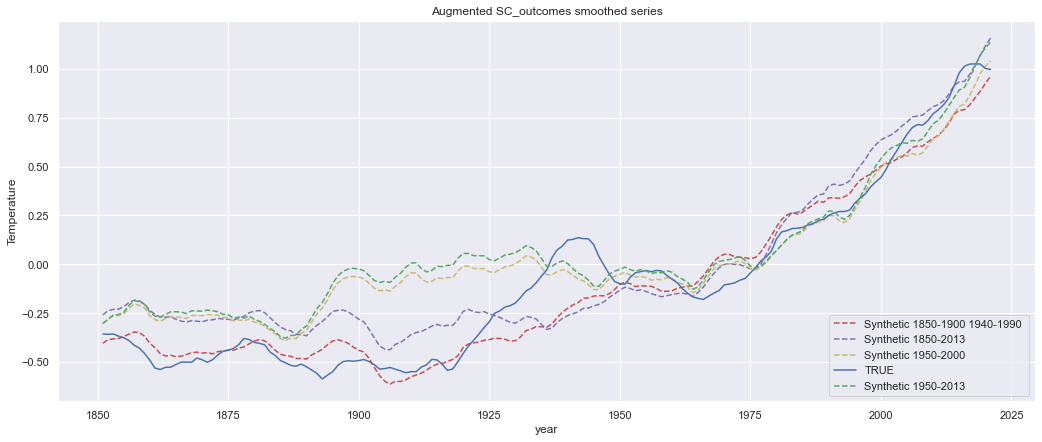

In [110]:
fig = plt.figure(figsize=(17.5,7)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc2),'r--', label="Synthetic 1850-1900 1940-1990 ");
#plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc0),'k--', label="Synthetic 1863-1913, 1963-2013");
#plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc_weight),'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc5),'y--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc1),'g--', label="Synthetic 1950-2013");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("Augmented SC_outcomes smoothed series")
plt.show()
fig.savefig("sc1_weight_augmented_trend", dpi=300)

In [100]:
true_error = remain_error(wasc_weight, X0_all,X1_all, 163,163)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(wasc),squared=False))
print('validation error: ', true_error)
print('W:', w)

mean squared reconstruction error using T=0-163:  0.22452654119540774
validation error:  0.5331859255252949
W: [ 5.04413924e-17  1.38693625e-01  2.37047645e-16  9.43779911e-01
  3.24975609e-01  1.41535973e-16 -9.83587388e-03  5.68627320e-01
  1.66263126e-16 -3.08490939e-02  2.47635155e-16]


In [107]:

#use 13-63, 113-163

true_error = remain_error(wasc0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)


#use 100-163

true_error =  remain_error(wasc1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)


#use100-150

true_outcomes = X1_all_plot
true_error =  remain_error(wasc5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)

#use 90-140 0-50
true_outcomes = X1_all_plot
true_error = remain_error(wasc2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)


#use 0-150

true_outcomes = X1_all_plot
true_error = remain_error(wasc4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)


true_error = remain_error(wasc_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)


mean squared reconstruction error using T=13-63, 113-163:  0.04780054683389717
validation error:  0.23982675456227046
mean squared reconstruction error using T=100-163:  0.09061997537641163
validation error:  0.30419792946193436
mean squared reconstruction error using T=100-150:  0.08194487885159225
validation error:  0.26226479663956487
mean squared reconstruction error using T=90-140 0-50:  0.08816017585633192
validation error:  0.1418711235859942
mean squared reconstruction error using T=0-150:  0.05991203962215869
validation error:  0.08672805565138851
mean squared reconstruction error using T=0-163:  0.05009168698745055
validation error:   0.06574939548351326


In [100]:
print(wasc0)
print(wasc2)

[ 2.70368843e-16  5.79759082e-03  1.09822345e-15  7.25413922e-01
  7.66790371e-15  5.75567665e-15  5.21072920e-16  4.75219310e-01
 -2.52403395e-01  1.10163663e-01 -2.44319002e-01]
[ 2.70368843e-16  5.79759082e-03  1.09822345e-15  7.25413922e-01
  7.66790371e-15  5.75567665e-15  5.21072920e-16  4.75219310e-01
 -2.52403395e-01  1.10163663e-01 -2.44319002e-01]


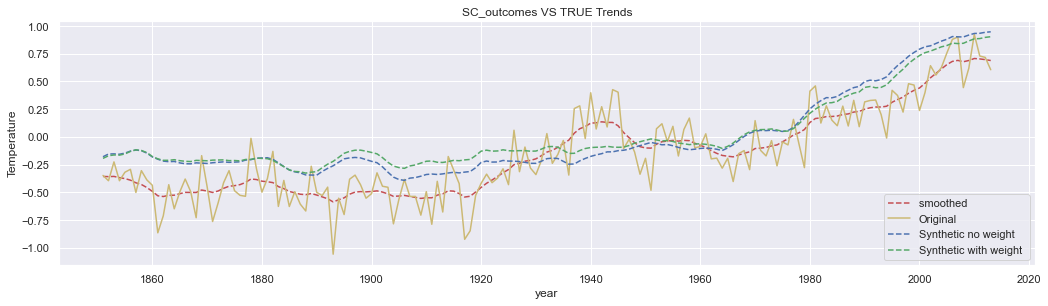

[1.57413079e-17 2.80086764e-17 0.00000000e+00 4.12996889e-01
 5.87003111e-01 3.32652856e-17 7.64498452e-18 0.00000000e+00
 2.27363312e-17 5.40139202e-18 0.00000000e+00]
       T=120-150        T=0-50       T=10-60       T=20-70      T=50-100  \
0   0.000000e+00  0.000000e+00  0.000000e+00  7.462720e-19  0.000000e+00   
1   4.791653e-17  3.198957e-17  0.000000e+00  0.000000e+00  1.362619e-17   
2   2.039342e-17  0.000000e+00  9.889088e-17  5.251910e-17  0.000000e+00   
3   2.239007e-01  8.326673e-16  2.351103e-01  4.459121e-01  1.983578e-01   
4   0.000000e+00  1.000000e+00  7.648897e-01  5.540879e-01  8.016422e-01   
5   1.103769e-17  6.609774e-18  0.000000e+00  9.193262e-18  2.396723e-17   
6   1.089169e-16  0.000000e+00  0.000000e+00  2.477644e-17  0.000000e+00   
7   7.760993e-01  0.000000e+00  0.000000e+00  1.282706e-17  3.285999e-17   
8   0.000000e+00  5.019565e-17  0.000000e+00  0.000000e+00  0.000000e+00   
9   2.204613e-17  0.000000e+00  5.015343e-17  4.433268e-17  0.000000e+0

In [83]:
smoothed = Kalman1D(X1_all_plot)
smoothed_pred = Kalman1D((X0_all_plot.T).dot(W0_no_weight))
smoothed_pred3 = Kalman1D((X0_all_plot.T).dot(W0_weight))
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),smoothed, 'r--', label="smoothed ")
plt.plot(range(1851,2014),X1_all_plot, 'y-', label="Original")
plt.plot(range(1851,2014),smoothed_pred, 'b--', label="Synthetic no weight  ")
plt.plot(range(1851,2014),smoothed_pred3, 'g--', label="Synthetic with weight ")
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE Trends")
plt.savefig('sc5')
plt.show()
print(W)
print(w)

In [115]:
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot(wasc_weight),squared=False)
print(c)

0.1758172903671368


# Synthetic Controls with predictors

In [66]:

data = pd.read_pickle('data')
panel_data = pd.read_pickle('panel_data')
#panel_data = panel_data.drop(index=('MPI_ESM1'))


#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(0, 163))]].values.T
X1_val = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
X0_double_int1 = X0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
X1_double_int1 = X1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
X0_100_163 = X0_all.loc[:,[i for i in list(range(100, 163))]].values.T
X1_100_163 = X1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
X0_double_int2= X0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
X1_double_int2 = X1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
X0_110_163 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_110_163 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)


X0_all_plot2 = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_plot2 = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [83]:
predictors = pd.read_pickle('predictors.T')
predictors = predictors.drop(index=('MPI_ESM'))
predictors = trend.T
#Z1_all = predictors.loc['TRUE']
#Z0_all = predictors.loc[predictors.index != 'TRUE', :]
Z1_all = Z1_trend
Z0_all = Z0_trend.T
#use years 0-50
Z0_zero = Z0_all.loc[:,[i for i in list(range(0, 50))]].values.T
Z1_zero = Z1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
Z0_double_int1 = Z0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
Z1_double_int1 = Z1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
Z0_100_163 = Z0_all.loc[:,[i for i in list(range(100, 163))]].values.T
Z1_100_163 = Z1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
Z0_hundreed =Z0_all.loc[:,[i for i in list(range(100, 150))]].values.T
Z1_hundreed= Z1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
Z0_double_int2= Z0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
Z1_double_int2 =Z1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
Z0_110_163 = Z0_all.loc[:,[i for i in list(range(110, 163))]].values.T
Z1_110_163 = Z1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
Z0_0_150 = Z0_all.loc[:,[i for i in list(range(0, 150))]].values.T
Z1_0_150 = Z1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)


Z0_all_plot2 = Z0_all.loc[:,[i for i in list(range(0, 163))]].values
Z1_all_plot2 = Z1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [82]:
def find_trend():
    trends ={}
    for i in range(0,11):
        XT1 = XT1 = Z0_all_plot2[i]
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends) 
    return trend
    
Z0_trend = find_trend()
Z1_trend = pd.DataFrame.from_dict(Kalman1D(Z1_all_plot2).flatten())
 

In [78]:
Z0_trend

,0,1,2,3,4,5,6,7,8,9
0,0.438093,-0.436162,-0.002412,-0.131072,-0.274007,-0.055645,0.140708,-0.217751,0.770005,0.633075
1,0.432588,-0.424943,-0.004628,-0.130824,-0.275952,-0.060602,0.126177,-0.210144,0.776938,0.639555
2,0.421988,-0.409181,-0.006928,-0.133044,-0.277914,-0.066772,0.107153,-0.200129,0.786126,0.648907
3,0.408335,-0.391410,-0.008637,-0.136318,-0.280021,-0.072951,0.086737,-0.189761,0.796166,0.660990
4,0.393822,-0.372032,-0.010041,-0.140064,-0.281386,-0.078601,0.068624,-0.178608,0.807285,0.676145
...,...,...,...,...,...,...,...,...,...,...
158,1.093354,0.827980,1.597015,1.068510,1.340105,1.342887,1.079715,0.637553,1.652027,1.751708
159,1.116902,0.833287,1.626725,1.072211,1.360290,1.364159,1.082228,0.652147,1.682318,1.783834
160,1.139692,0.838340,1.653784,1.074728,1.375287,1.381961,1.082888,0.663432,1.707442,1.810156
161,1.158400,0.842484,1.675685,1.076483,1.384650,1.394962,1.083050,0.671860,1.725085,1.827915


In [96]:
#USE PREDICTORS
def w_mse(w, v, x0, x1): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w, v, x0, x1): return np.sum(w) - 1

def v_constraint(V, W, X0, X1, Z0, Z1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=(v, x0, x1), disp=False, full_output=True)[0]

def fun_v(v, w, x0, x1, z0, z1): return mean_squared_error(z1, z0.dot(fun_w(w, v, x0, x1)))

def solve_synthetic_control2(X0, X1, Z0, Z1,weight=False):
    k,j = X0.shape
    V0 = 1/k*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)

    if weight:
        for i in range(0,int(k/2)):
            V0[i]=l[i]*2
            V0[i+int(k/2)] = l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W0 = 1/j*np.zeros(j).transpose()
    V = fmin_slsqp(fun_v, V0, args=(W0, X0, X1, Z0, Z1), bounds=[(0.0, 1.0)]*len(V0), disp=True, f_eqcons=v_constraint, acc=1e-6)
    W = fun_w(W0, V, X0, X1)
    return V, W

#V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
#V, W = solve_synthetic_control(X0, X1, X0_val, X1_val)
#print(V)
#print(W)


In [97]:

w3 = pd.DataFrame()


#use 13-63, 113-163
V0, W0 = solve_synthetic_control2(np.vstack((X0_double_int1,Z0_double_int1)), np.vstack((X1_double_int1,Z1_double_int1)),X0_double_int1,X1_double_int1,True)
SC_outcomes0 = (X0_all_plot2.T).dot(W0)
true_outcomes = X1_all_plot2
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w3['T=3-63, 113-163'] = W0

#use 100-163
V0, W1 = solve_synthetic_control2(np.vstack((X0_100_163,Z0_100_163)), np.vstack((X1_100_163,Z1_100_163)),X0_100_163,X1_100_163,True)
SC_outcomes1 = (X0_all_plot2.T).dot(W1)
true_outcomes = X1_all_plot2
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w3['T=100-163'] = W1

#use100-150
V0, W5 = solve_synthetic_control2(np.vstack((X0_hundreed,Z0_hundreed)), np.vstack((X1_hundreed,Z1_hundreed)),X0_hundreed,X1_hundreed,True)
SC_outcomes5 = (X0_all_plot2.T).dot(W0)
true_outcomes = X1_all_plot2
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w3['T=100-150'] = W5

#use 90-140 0-50
V0, W2 = solve_synthetic_control2(np.vstack((X0_double_int2,Z0_double_int2)), np.vstack((X1_double_int2,Z1_double_int2)),X0_double_int2,X1_double_int2,True)
SC_outcomes2 = (X0_all_plot2.T).dot(W2)
true_outcomes = X1_all_plot2
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w3['T=90-140 0-50'] = W2




#use 0-150
V0, W4 = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),X0_0_150,X1_0_150,True)
SC_outcomes4 = (X0_all_plot2.T).dot(W4)
true_outcomes = X1_all_plot2
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w3['T=0-150'] = W4


fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control2(np.vstack((X0_all_plot2.T,Z0_all_plot2.T)), np.vstack((X1_all_plot2,Z1_all_plot2)),X0_all_plot2.T,X1_all_plot2,True )
SC_outcomes_all = (X0_all_plot2.T).dot(W0_no_weight)
true_outcomes = X1_all_plot2
true_error = 0
#true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w3['T=0-163'] = W0_no_weight

#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.050998000699532725
            Iterations: 6
            Function evaluations: 1210
            Gradient evaluations: 6
mean squared reconstruction error using T=13-63, 113-163:  0.044931138517285175
validation error:  0.2012417069446313
W: [8.01079568e-17 1.01407287e-17 0.00000000e+00 6.38393134e-01
 1.85468508e-16 0.00000000e+00 7.36433958e-17 3.61606866e-01
 0.00000000e+00 3.39719057e-17 0.00000000e+00]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.010214156291342848
            Iterations: 6
            Function evaluations: 762
            Gradient evaluations: 6
mean squared reconstruction error using T=100-163:  0.09399067564403822
validation error:  0.3734035676879192
W: [0.00000000e+00 7.35442365e-17 3.27614290e-17 1.80097949e-01
 0.00000000e+00 0.00000000e+00 7.39646225e-18 8.19902051e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Optim

<Figure size 1260x324 with 0 Axes>

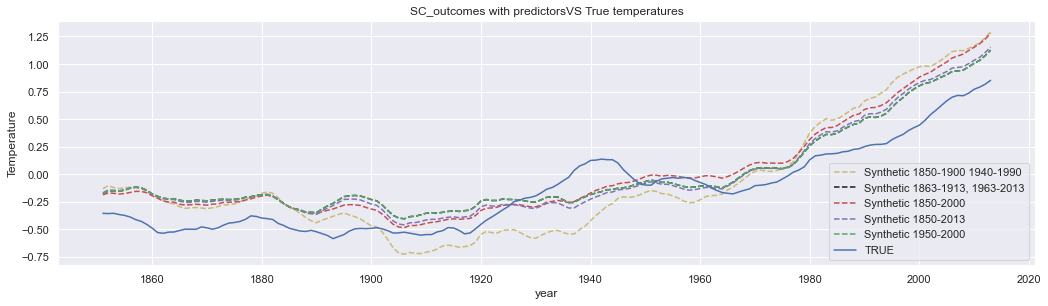

0.044931138517285175
[8.01079568e-17 1.01407287e-17 0.00000000e+00 6.38393134e-01
 1.85468508e-16 0.00000000e+00 7.36433958e-17 3.61606866e-01
 0.00000000e+00 3.39719057e-17 0.00000000e+00]


In [98]:
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2014),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2014),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2014),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2014),SC_outcomes5,'g--', label="Synthetic 1950-2000");
plt.plot(range(1851,2014),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes with predictorsVS True temperatures")
plt.show()
fig.savefig("sc1_with_predictors", dpi=300)
print(mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print(W0)

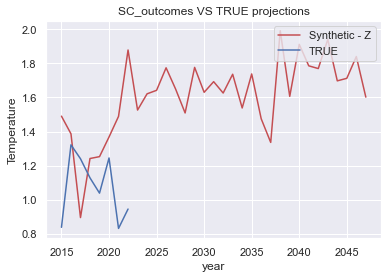

[0.8364805221400101, 1.3215710799326201, 1.2396620313735012, 1.1272278534155247, 1.0374700743273226, 1.2442480213989162, 0.8299812642028578, 0.943871047508812]
0.49179692434871675


In [41]:
proj = pd.read_pickle('projections')
X=proj

predicted_temp= (X).dot(W0)
#predicted_temp_no= (X).dot(W0_no_weight)
true = 'Downloads/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
proj_true_temp=temp_mean[1979:]
proj_true_temp = np.average(proj_true_temp.reshape(-1, 3), axis=1)
proj =[]
for i in range(0,29,4):
    proj.append(proj_true_temp[i])
plt.plot(range(2015,2048),predicted_temp, 'r-', label="Synthetic - Z");
plt.plot(range(2015,2023),proj, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE projections")

plt.show()
print(proj)
print(mean_squared_error( np.array(proj),predicted_temp[:8],squared=False))

In [42]:
X= pd.read_pickle('projections2').drop(columns=['MPI_ESM1'])
x=np.arange(0,163).reshape(-1, 1)
x2= np.arange(0,163+8).reshape(-1, 1)
x3= np.arange(0,196).reshape(-1, 1)
model = LinearRegression()
model.fit(x, X1_all_plot)
# calculate trend
trend_true = model.predict(x)
model.fit(x,(X0_all_plot.T).dot(W01))
trend_sc =  model.predict(x)
#calculate trend until 2022
print(X0_all_plot.shape)
print(X.to_numpy().T.shape)
extended_true = np.concatenate((X1_all_plot.reshape(163),np.array(proj).reshape(8)))
#extended_synthetic = np.concatenate((X0_all_plot.T,X.to_numpy()))
model.fit(x2, extended_true)
extended = model.predict(x2)
print(extended_synthetic.shape)
model.fit(x3, extended_synthetic.dot(W01))
extended_s = model.predict(x3)

# plot trend
plt.plot(extended, label ='True temperature trend including 2015-2022')
plt.plot(trend_sc , label ='SC trend')
#plt.plot(extended_s, label ='SC temperature trend including 2015-2022')
plt.plot(X1_all_plot, label ='True temperature')
plt.plot(trend_true, label = 'True temperature trend ')
plt.ylabel('Predicted Vs True trend')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.show()
print(W0)

(11, 163)
(9, 33)


NameError: name 'extended_synthetic' is not defined

# Student - t approach 

In [84]:
import pymc3 as pm 

In [157]:
def mu(w,x):
    out=0
    for i in range(0,len(w)):
        out += x.T[i] * w[i]
    print((out))
    return out


with pm.Model() as studentt:
    # Prior distribution
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    w1=[]
    for i in range(0,11):
        s= pm.Normal(str(i), 0.5, sigma=1)
        w1.append(s)
    n = pm.Gamma('n', alpha = 2, beta = 0.1)
    
    # Likelihood
    lik = pm.StudentT('y', nu=n, mu = mu(w1,X0_all_plot.T), sigma=sigma, observed=X1_all_plot.flatten().astype('float'))
        
    # draw 1000 posterior samples using NUTS sampling + 1000 of warmup on 4 chain
    trace_tstudent = pm.sample(1000, tune=1000)    

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [158]:
import arviz as az

In [159]:
res = az.summary(trace_tstudent)
w = np.array(res['mean'])[:-2]
print(w)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


[ 0.027  0.104  0.008  0.259  0.378  0.07  -0.076  0.167 -0.234  0.006
 -0.059]


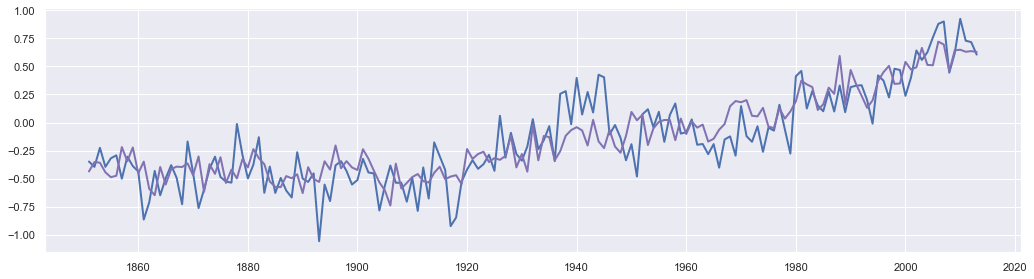

In [160]:
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),BCC_XSM2_MR_outcomes, label="true", lw=2.0)
plt.plot(range(1851,2014), X0_all_plot.T.dot(w.T), label="t-regression ", lw=2.0, color = "m")
plt.show()

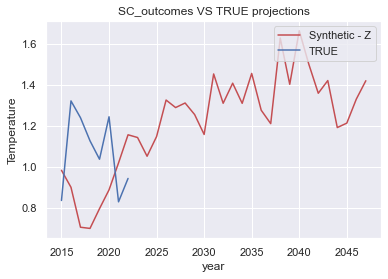

In [161]:
X= pd.read_pickle('projections')
plt.plot(range(2015,2048),X.dot(w.T), 'r-', label="Synthetic - Z")
plt.plot(range(2015,2023),proj, 'b-', label="TRUE")

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE projections")

plt.show()

In [156]:
X

,ACCESS_CM2,BCC_XSM2_MR,CanESM5_CanOE,CNRM_CM6,KACE,CESM2,CNRM_ESM1,GFDL_ESM4,UKESM1,HadGEM_GC31_LL,MIROC6
0,2.192911,0.930684,2.036687,1.971929,1.784486,1.514276,1.284411,0.757471,2.034565,2.454116,0.804869
1,2.076397,1.510546,1.763232,1.529481,1.790835,1.397761,1.406644,1.168522,2.307194,2.060158,0.985175
2,1.984288,1.287989,2.449264,1.038935,1.967710,1.305652,1.251774,0.672957,2.433012,2.775840,1.182812
3,2.372274,1.091322,2.339755,1.427129,1.532328,1.693639,1.337593,0.958271,2.344813,2.531013,1.493820
4,1.743446,1.418214,2.728170,1.391812,1.951774,1.064810,1.176898,1.039623,2.473669,2.547947,1.916205
5,2.204255,1.132816,2.273553,1.254371,2.168281,1.525619,1.879654,1.540300,2.550606,2.581470,1.552623
6,2.172036,1.367114,2.628696,1.704521,2.549220,1.493401,2.160151,1.161114,2.899829,2.192544,1.293446
7,2.149017,1.143746,2.781628,2.185024,2.379565,1.470381,1.407566,1.414248,2.839142,2.814822,1.571967
8,2.366771,1.280317,2.830437,1.773653,2.811929,1.688135,1.816908,1.149742,2.966970,2.471898,1.548329
9,2.820357,1.456142,2.924438,1.792671,2.387379,2.141721,1.798921,1.361322,3.053297,2.848452,1.845437
